<a href="https://colab.research.google.com/github/pudgewithmom/python-basics/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   4.Основные компоненты **matplolib**


MPL очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов:

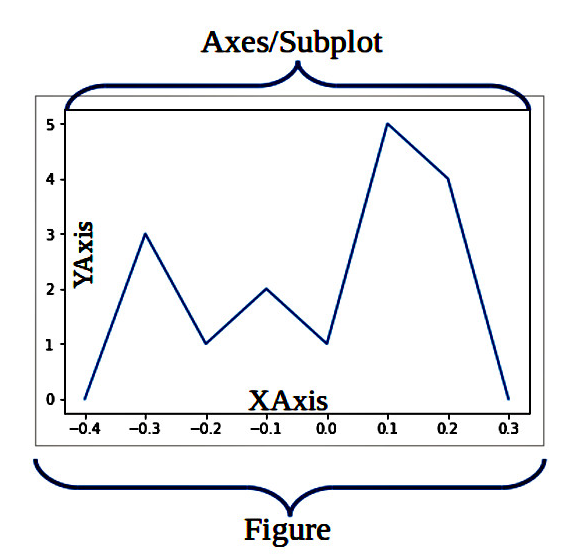

*Figure* - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.

*Axes* - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты. В Этом уроке мы будем контролировать тики, метки и пределы данных через другие механизмы, поэтому подробно рассматривать оси мы не будем.

# **4.1. Начало работы**

Давайте попробуем выполним следующий код:

In [3]:
import matplotlib.pyplot as plt


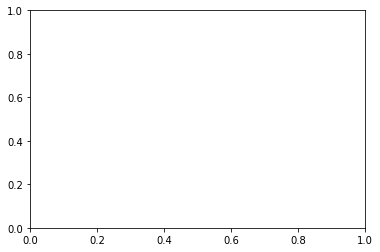

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

В строке `fig = plt.figure()` мы создали область Figure (экземпляр класса figure).

В строке` ax = fig.add_subplot(111)` мы добавили к Figure область Axes.

Вообще, было бы правильнее использовать `fig.add_axes`, но в данном случае `fig.add_subplot(111)` намного удобнее, в конце концов subplot просто размещает Axes на сетке Figure. 

Обратите внимание на параметр, который мы передаем 111 - это первая строка, первый столбец и первая (единственная) ячейка на сетке Figure.

В том что Figure и Axes это разные области можно легко убедиться если изменить их цвет:

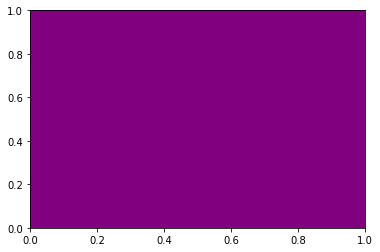

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'white')
ax.set(facecolor = 'purple')

plt.show()

Кстати, Axes должна принадлежать только одной области Figure. Как правило, всегда сначала создается область Figure, а затем с помощью **add_subplot()** в Figure размещается одна или несколько областей Axes.


---



А теперь обратите внимание на то, как с помощью метода **set()** мы изменили цвет Figure и Axes. 

По сути, это самый быстрый способ устанавливать параметры, но он не самый явный. Давайте установим параметры явно. 

Сотрите строчку `fig.set(facecolor = 'green')`, а затем напечатайте fig.set и нажмите клавишу Tab после чего вы увидите длинный список всех методов Figure, которые начинаются с set:

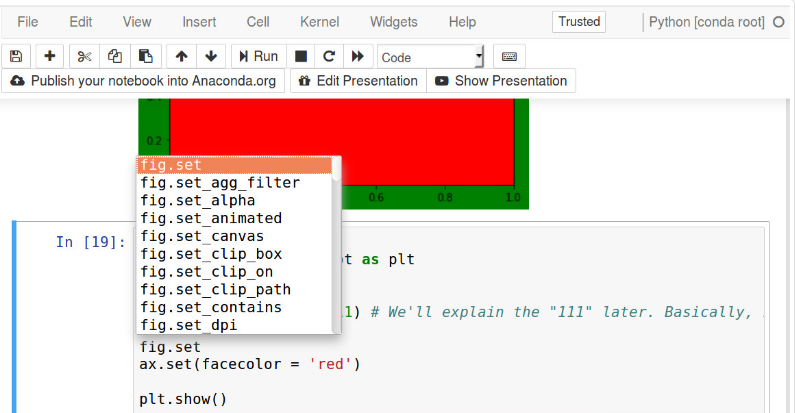

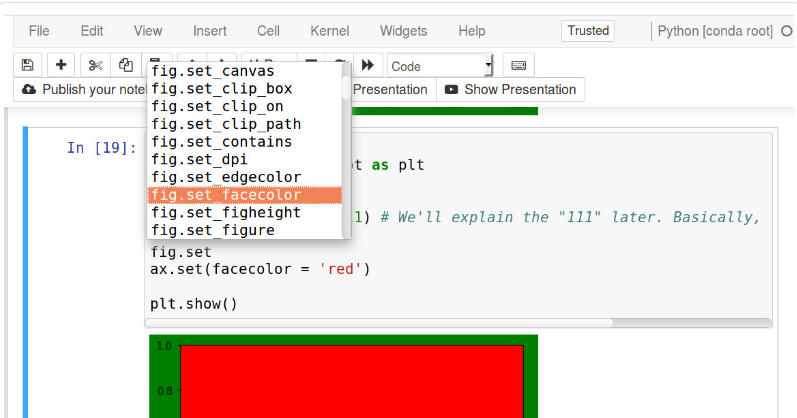

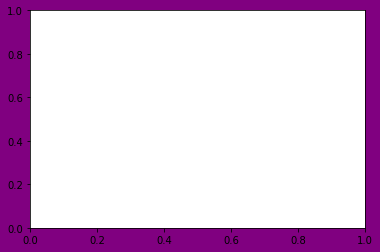

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.

fig.set_facecolor('purple')
ax.set(facecolor = 'white')

plt.show()

Тоже самое мы можем проделать и с Axes. Кстати, именно Axes вам придется видоизменять чаще всего, поэтому давайте установим побольше параметров для данной области:

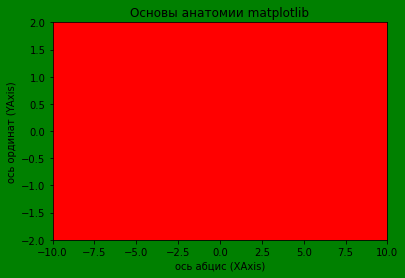

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.

fig.set_facecolor('green')

ax.set_facecolor('red')
ax.set_xlim([-10, 10])
ax.set_ylim([-2, 2])
ax.set_title('Основы анатомии matplotlib')
ax.set_xlabel('ось абцис (XAxis)')
ax.set_ylabel('ось ординат (YAxis)')

plt.show()

Хотя мы могли бы выполнить это более коротким способом:

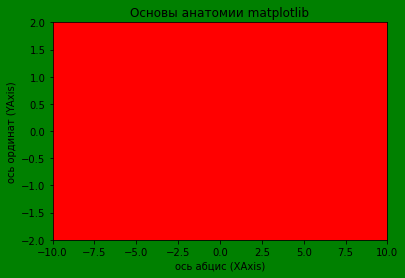

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'red',
       xlim = [-10, 10],
       ylim = [-2, 2],
       title = 'Основы анатомии matplotlib',
       xlabel = 'ось абцис (XAxis)',
       ylabel = 'ось ординат (YAxis)')

plt.show()

Данный способ хорош если вы обладаете некоторым опытом и помните имена всех параметров наизусть. Новичкам я все-таки рекомендую явный способ установки параметров: так и быстрее (благодаря автодополнению) и очевиднее.

---



Метод set есть практически у всех объектов matplotlib. Например, нам вдруг захотелось изменить цвет и размер title. Для этого существуют так же два способа:

In [ ]:
#  Способ №1:
ax.set_title('Основы анатомии matplotlib', color = 'white', size = 20)

#  Способ №2:
ax.set_title('Основы анатомии matplotlib')
ax.title.set_color('white')
ax.title.set_size(20)

В таких случаях первый способ, снова, кажется более простым. Но все же второй способ позволяет создавать код который легко понять и в котором легко ориентироваться, а это тоже очень дорогого стоит.

И еще, напоследок, график который мы создали - это просто издевательство над восприятием человека. Такие графики можно делать только для примера! Создание отличных графиков - это целая наука (или искусство), у которой даже есть название *инфографика.*

# **4.2. Отображение данных на графике**

Большинство графиков: линий, гистограмм, круговых диаграмм т.е. отображений данных происходит на Axes. Поэтому, для рисования на Axes необходимо использовать какой-нибудь из его методов.

К слову сказать, этих методов целая куча, но мы сосредоточимся всего на двух: **plot и scatter.**



1.   plot рисует точки соединенные линиями;
2.   scatter просто рисует точки.


Давайте построим простой график на котором будет присутствовать отображение одних данных точками, а других линиями:


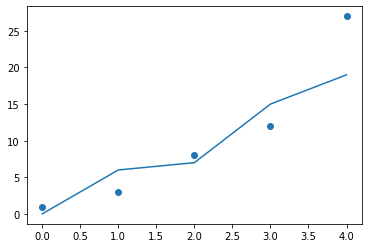

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19])
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27])

plt.show()

Нарисованные данные так же поддерживают самые разные параметры внешнего вида:

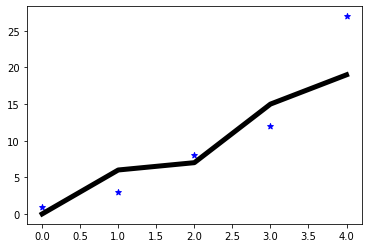

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], color = 'black', linewidth = 5)
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'blue', marker = '*')

plt.show()

Параметры внешнего вида придется указывать (если надо) вместе с данными внутри ax.plot() и ax.scatter(). Это противоречит моим рекомендациям, но и в этом случае можно оформить код в более читаемый вид:

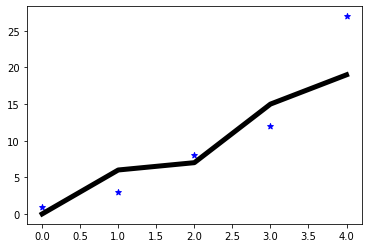

In [ ]:
x = [0, 1, 2, 3, 4]
y_1 = [0, 6, 7, 15, 19]
y_2 = [1, 3, 8, 12, 27]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y_1,
        color = 'black',
        linewidth = 5)

ax.scatter(x, y_2,
           color = 'blue',
           marker = '*')

plt.show()

# **4.3. Методы Axes и pyplot**

Сейчас вы поймете как мы раньше создавали графики без всяких Figure и Axes. Дело в том что почти все методы axes присутствуют в модуле pyplot.

Например, при вызове `plt.title('spam')` модуль pyplot вызывает `ax.set_title('spam')`.

Можно сказать, что модуль pyplot создает Figure и Axes автоматически (хотя это не совсем так). Фактически мы можем переписать весь наш пример следующим образом:

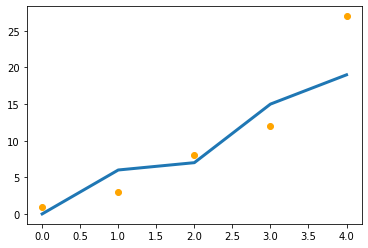

In [ ]:
plt.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], linewidth = 3)
plt.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'orange')

plt.show()

Но мы больше не будем так делать, потому что "Явное лучше чем неявное". Нет, если мы строим так сказать "одноразовые графики" с небольшими скриптами, только ради того что бы что-то быстро визуализировать, то от краткости скриптов мы только выигрываем.

Однако, если нам придется работать с несколькими областями Axes или придется создавать большие скрипты для построения сложной графики, то использование явных определений Figure и Axes сделает код более очевидным и понятным, пускай даже за счет увеличения его объема.

# **4.4. Несколько Axes на одной Figure**

Очень часто, нам необходимо размещать несколько графиков рядом друг с другом. Это проще всего сделать используя `plt.subplots()`. Но давайте для начала разберем следующий пример:

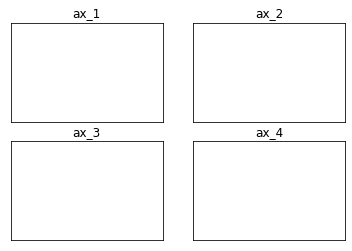

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

В этом примере, так же как и раньше, мы сначала создали область Figure, а затем с помощью команды` fig.add_subplot()` начали добавлять, одну за другой область Axes (ax_1, ax_2, ax_3, ax_4).

Причем заметьте, каждая область Axes является независимой от других, то есть на на них могут быть нарисованы самые разные графики и установлены самые разные параметры внешнего вида.

Теперь давайте немного разберемся с тем что делает метод `add_subplot()`. А делает он следующее, разбивает Figure на указанное количество строк и столбцов. После такого разбиения Figure можно представить как таблицу (или координатную сетку). Затем область Axes помещается в указанную ячейку. Для всего этого add_subplot() необходимо всего три числа, которые мы и передаем ему в качестве параметров:

* первое - количество строк;
* второе - количество столбцов
* третье - индекс ячейки.

Индексирование полученных ячеек начинается с левого верхнего угла, выполняется построчно слева-направо и заканчивается в правом нижнем углу:

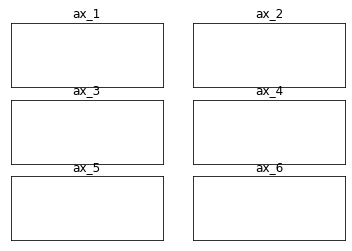

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

Заполнять областями Axes всю область Figure **не обязательно**:

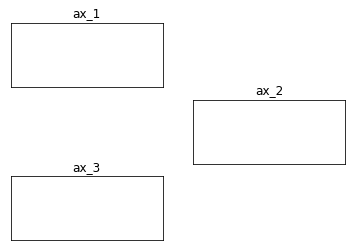

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 2, 5)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

Каждый отдельный вызов add_subplot() выполняет разбивку Figure, так как как указано в его параметрах и не зависит от предыдущих разбиений:

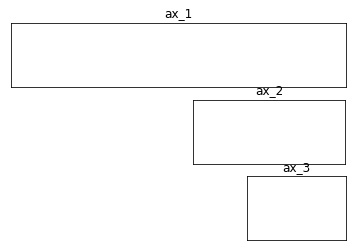

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 3, 9)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

Такое поведение метода `add_subplot()` позволяет располагать графики как вам необходимо. Области Axes могут перекрывать друг-друга, быть разного размера или разделенными некоторым пространством, впрочем, как и размещаться в произвольных местах:

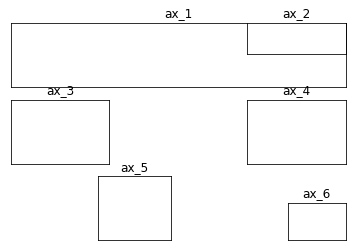

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(6, 3, 3)
ax_3 = fig.add_subplot(3, 3, 4)
ax_4 = fig.add_subplot(3, 3, 6)
ax_5 = fig.add_subplot(3, 4, 10)
ax_6 = fig.add_subplot(5, 5, 25)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

# **4.5. subplots()**

Конечно, такой способ размещения некоторого количества областей Axes на Figure довольно гибок, но на практике функция `plt.subplots(nrows, ncols)` оказывается гораздо удобнее:

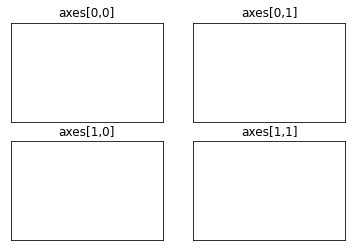

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.show()

Очень часто нам нужно что бы наши области Axes были расположены на самой обычной сетке. Что в общем то и делает `plt.subplots(nrows, ncols)`. Однако не следует забывать, что как правило, все чуточку сложнее. Давайте выполним следующий код:

(<Figure size 432x288 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd82d7b5ed0>,
      dtype=object))


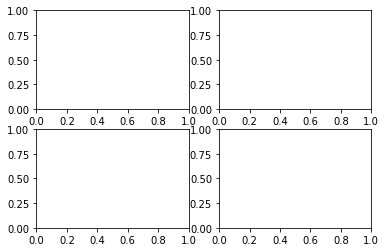

In [ ]:
print(plt.subplots(nrows = 2, ncols = 2))

Если вглядеться в вывод, то становится видно, что plt.subplots(nrows, ncols) создает кортеж из двух элементов:

* Область Figure;
* Массив объектов NumPy, состоящий из двух строк и двух столбцов. Каждый элемент этого массива представляет собой отдельную область Axes, к которой можно обратиться по ее индексу в данном массиве.

Для дальнейшей работы с данными областями нам необходимо распаковать данный кортеж, что мы и делаем в строке:

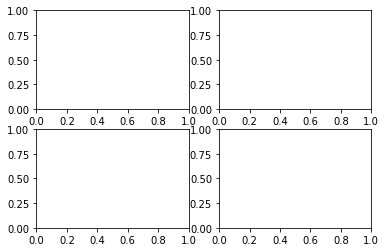

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

Теперь fig - это Figure, а axes - это массив NumPy, элементами которого являются объекты Axes. 

Далее, мы решили установить каждой области Axes свой заголовок:

In [ ]:
axes[0, 0].set(title='axes[0, 0]')
axes[0, 1].set(title='axes[0, 1]')
axes[1, 0].set(title='axes[1, 0]')
axes[1, 1].set(title='axes[1, 1]')

[Text(0.5, 1.0, 'axes[1, 1]')]

Поскольку каждый заголовок (как-бы) уникальный, нам пришлось вручную вызвать каждую область Axes и устанавливать для нее параметр title.

Но если для каждой области нам необходимо установить одинаковые параметры, то это можно сделать в цикле:

In [ ]:
for ax in axes.flat:
    ax.set(xticks=[], yticks=[])

Хотя, зачастую, даже заголовки можно установить в том же самом цикле:

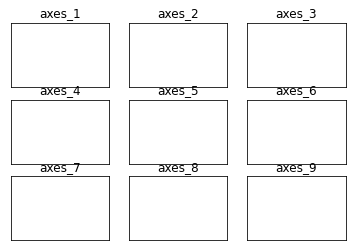

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3)

n = 1

for ax in axes.flat:
    ax.set(title='axes_' + str(n), xticks=[], yticks=[])
    n += 1
plt.show()

По умолчанию количество строк и столбцов в методе subplots равно 1, что удобно для быстрого создания Figure с одной областью Axes:

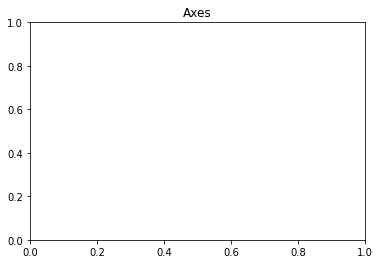

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()       #  одна строка вместо двух:
                               #  fig = plt.figure()
                               #  ax = fig.add_subplot(111)
ax.set(title='Axes')
    
plt.show()

Далее, в таких простых случаях, мы будем очень часто пользоваться именно этой строкой fig, ax = plt.subplots() - это сокращает код, но не преуменьшает его ясности (мы по прежнему создаем Figure и помещаем на нее Axes).


---



# **5.Как строить графики?**

In [2]:
import numpy as np

Как размещать несколько графиков вместе (несколько областей Axes на Figure) мы разобрались. Как теперь строить эти самые графики? Все довольно просто, после того как мы создали область Axes, которая по сути является объектом Python, мы можем воспользоваться любым из методов этого объекта, включая и те, которые занимаются отображением данных на этой области:

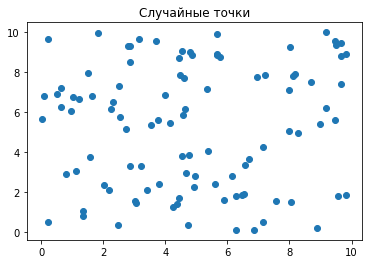

In [ ]:
fig, ax = plt.subplots()

#  Данные, которые хотим отобразить:
x1 = 10*np.random.rand(100)    #  координаты 'x'
y1 = 10*np.random.rand(100)    #  координаты 'y'

ax.scatter(x1, y1)    #  метод, отображающий данные в виде точек
                      #  на плоскости

ax.set(title='Случайные точки')    #  метод, размещающий заголовок
                                       #  над "Axes"
    
plt.show()

При этом мы можем отображать на одной области Axes несколько наборов данных, как одинаковыми так и разными методами:

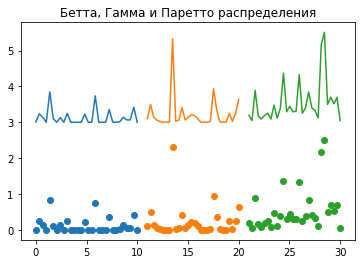

In [ ]:
fig, ax = plt.subplots()

x1 = np.linspace(0, 10, 30)
y1 = np.random.beta(0.1, 0.6, size = 30)
x2 = np.linspace(11, 20, 30)
y2 = np.random.gamma(shape = 0.3, scale = 1.1, size = 30)
x3 = np.linspace(21, 30, 30)
y3 =np.random.pareto(3.5, size = 30)

#  Данные в виде точек:
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)

#  Данные в виде линий:
ax.plot(x1, y1 + 3)
ax.plot(x2, y2 + 3)
ax.plot(x3, y3 + 3)

ax.set(title='Бетта, Гамма и Паретто распределения')
    
plt.show()

В случае, когда у нас несколько областей Axes, то отображение на них данных, ничем не отличается от случая единственной области. Однако, если вы помните, области Axes можно добавить двумя способами: add_subplot() и subplots(). Давайте рассмотрим случай add_subplot():

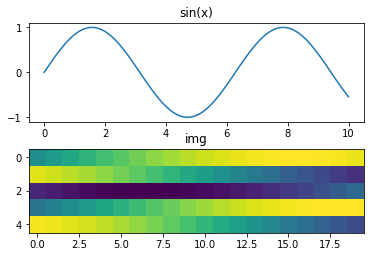

In [ ]:
#  Данные:
x = np.linspace(0, 10, 100)
y = np.sin(x)
img = y.reshape(5, 20)

#  Создаем "Figure" и "Axes":
fig = plt.figure()

ax_1 = fig.add_subplot(2, 1, 1)
ax_2 = fig.add_subplot(2, 1, 2)

#  Методы, отображающие данные:
ax_1.plot(x, y)
ax_2.imshow(img)

#  Добавление заголовков:
ax_1.set(title = 'sin(x)')
ax_2.set(title = 'img')

plt.show()

В случае subplots() все тоже самое, только к областям Axes мы обращаемся по индексу:

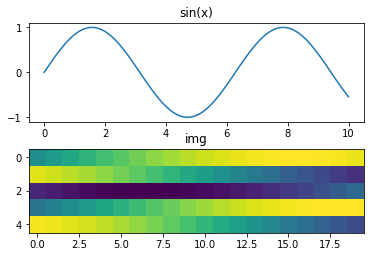

In [ ]:

#  Данные:
x = np.linspace(0, 10, 100)
y = np.sin(x)
img = y.reshape(5, 20)

#  Создаем "Figure" и "Axes":
fig, axes = plt.subplots(nrows = 2, ncols = 1)

#  Методы, отображающие данные:
axes[0].plot(x, y)
axes[1].imshow(img)

#  Добавление заголовков:
axes[0].set(title = 'sin(x)')
axes[1].set(title = 'img')

plt.show()

# **5.1. Plot - график линии**

Без преувеличения - это самый распространенный график и как он строится нам уже известно. Давайте разберемся с тем, как сделать эти графики более привлекательными.

---
**Цвет линии**

Цвет линии можно указать с помощью параметра color. Само значение цвета может быть из самых разных цветовых моделей:

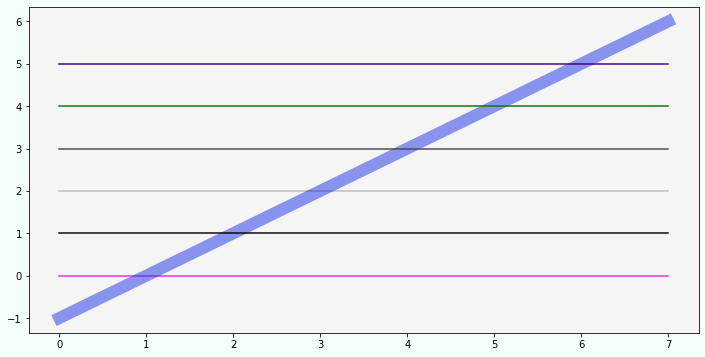

In [ ]:
x = np.zeros(8)

fig, ax = plt.subplots()

# RGB:
ax.plot(x, color = (0.9, 0.2, 0.9))

# RGBA:
ax.plot(np.arange(-1, 7),
        color = (0.1, 0.2, 0.9, 0.5),
        linewidth = 12)

# hex RGB:
ax.plot(x + 1, color = '#0a0b0c')

# hex RGBA:
ax.plot(x + 2, color = '#0a0b0c3a')

# уровень серого в интервале [0, 1]:
ax.plot(x + 3, color = '0.3')

# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.plot(x + 4, color = 'g')

# название цвета из X11/CSS4:
ax.plot(x + 5, color = 'indigo')

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('mintcream')
ax.set_facecolor('whitesmoke')

plt.show()

Поддержка такого количества цветовых моделей позволяет выбирать именно ту, которая в данной ситуации наиболее удобна. Например, на лекции, я могу быстро установить цвет линии с помощью односимвольного ключа из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}, но готовя график для презентации или публикации мне удобнее использовать X11/CSS4. В случае, когда цвет из X11/CSS4 не подходит, смотрю его код RGB и подгоняю до тех пор пока он меня не устроит. Некоторые мои знакомы подбирают цвета на специальных онлайн сервисах.

Наклоненная линия, цвет которой задан в модели RGBA увеличена в ширине, для наглядности ее прозрачности. Ширина линии задается с помощью параметра linewidth. Этот параметр часто применяется при изменении начертания линии:

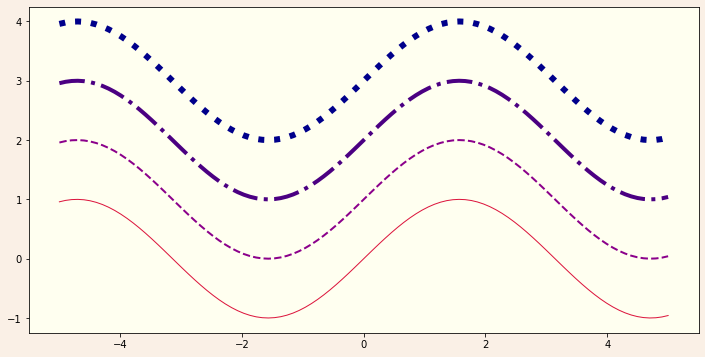

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)

fig, ax = plt.subplots()

#  Сплошная линия ('-' или 'solid',
#  установлен по умолчанию):
ax.plot(x, y,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')

# Пунктирная линия ('--' или 'dashed'):
ax.plot(x, y + 1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')

# Точка-тире ('-.' или 'dashdot'):
ax.plot(x, y + 2,
        linestyle = '-.',
        linewidth = 4,
        color = 'indigo')

# Точка-точка (':' или 'dotted'):
ax.plot(x, y + 3,
        linestyle = ':',
        linewidth = 6,
        color = 'darkblue')

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('linen')
ax.set_facecolor('ivory')

plt.show()

Рано или поздно вы заметите, что тонкие пунктирные линии заставляют очень сильно напрягать зрение, но если слегка увеличить их ширину, то они воспринимаются гораздо легче.

Улучшить восприятие линии можно так же с помощью маркеров:

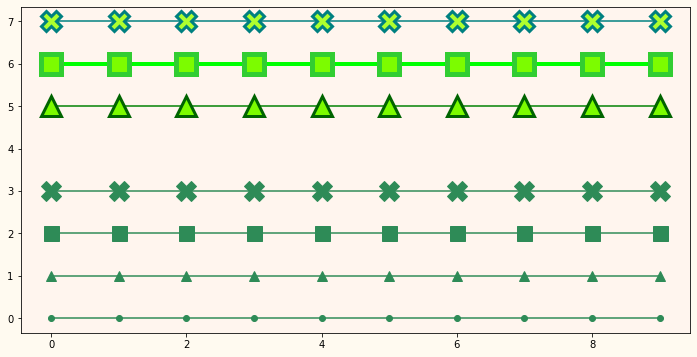

In [ ]:
x = np.zeros(10)

fig, ax = plt.subplots()

#  Вид (marker)и размер маркера (markersize):
ax.plot(x,
        marker = 'o',
        color = 'seagreen')
ax.plot(x + 1,
        marker = '^',
        markersize = 10,
        color = 'seagreen')
ax.plot(x + 2,
        marker = 's',
        markersize = 15,
        color = 'seagreen')
ax.plot(x + 3,
        marker = 'X',
        markersize = 20,
        color = 'seagreen')

#  Цвет маркера (markerfacecolor),
#  его края (markeredgecolor) и
#  толщина его края (markeredgewidth):
ax.plot(x + 5,
        marker = '^',
        markersize = 20,
        color = 'green',
        markerfacecolor = 'lawngreen',
        markeredgecolor = 'darkgreen',
        markeredgewidth = 3)
ax.plot(x + 6,
        marker = 's',
        markersize = 20,
        color = 'lime',
        linewidth = 4,
        markerfacecolor = 'lawngreen',
        markeredgecolor = 'limegreen',
        markeredgewidth = 5)
ax.plot(x + 7,
        marker = 'X',
        markersize = 20,
        color = 'teal',
        markerfacecolor = 'greenyellow',
        markeredgecolor = 'teal',
        markeredgewidth = 3)

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# **5.2. Scatter - график разброса (точки)**

График разброса - это тоже очень распространенный график. Как правило, именно глядя на него, начинаешь понимать, что в данных есть что-то любопытное. И как правило, этот график практически никогда не требует никакого изменения своего внешнего вида. Но иногда, наглядность данных сильно снижается из-за небольших размеров графика, а так же размеров и цветов используемых маркеров.


---


**Цвет точек**

Цвет линии можно указать с помощью параметра c. Само значение цвета может быть из самых разных цветовых моделей.

Точки одного цвета:

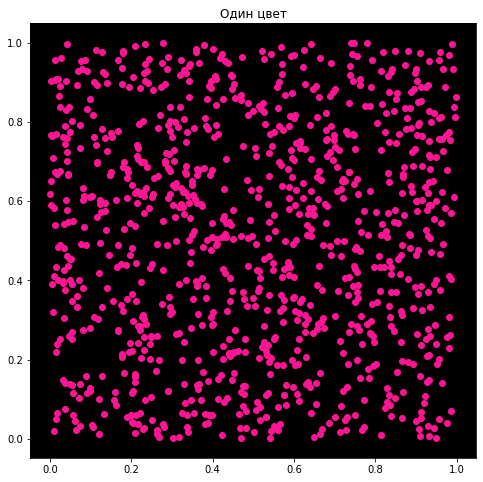

In [ ]:
x = np.random.rand(1000)    #  x - координаты точек
y = np.random.rand(1000)    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Если вы хотите поместить на одном графике разные наборы данных, то каждому такому набору можно сопоставить свой цвет точек:

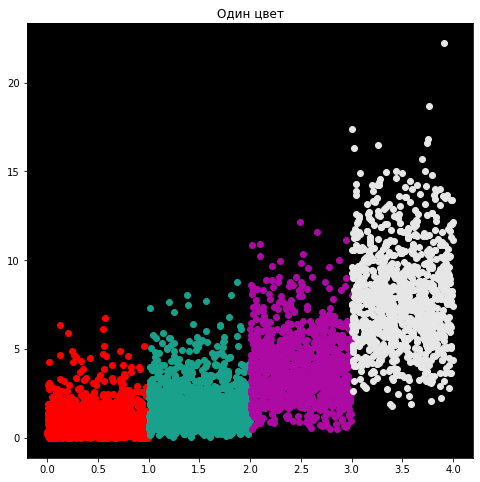

In [ ]:
x = np.random.rand(1000)
y1 = np.random.gamma(1, size = 1000)
y2 = np.random.gamma(2, size = 1000)
y3 = np.random.gamma(4, size = 1000)
y4 = np.random.gamma(8, size = 1000)

fig, ax = plt.subplots()

# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.scatter(x, y1,
           c = 'r')
# RGB:
ax.scatter(x + 1, y2,
           c = [[0.1, 0.63, 0.55]])
# hex RGB:
ax.scatter(x + 2, y3,
           c = '#ad09a3')
# уровень серого в интервале [0, 1]:
ax.scatter(x + 3, y4,
           c = ['0.9'])


ax.set_facecolor('black')
ax.set_title('Один цвет')

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

# **5.3. Bar - гистограмма**

Гистограммы устроены очень просто, но изменяя различные параметры мы можем отобразить с их помощью очень много информации, а так же повысить как наглядность данных так и привлекательность самого графика.



---



**Ширина прямоугольников**

Чаще всего мы строим гистограммы из одиночных наборов данных, в таких случаях мы можем обойтись, вообще, без каких бы то ни было изменений графика. Просто строим одну или несколько гистограмм на одной области Figure:

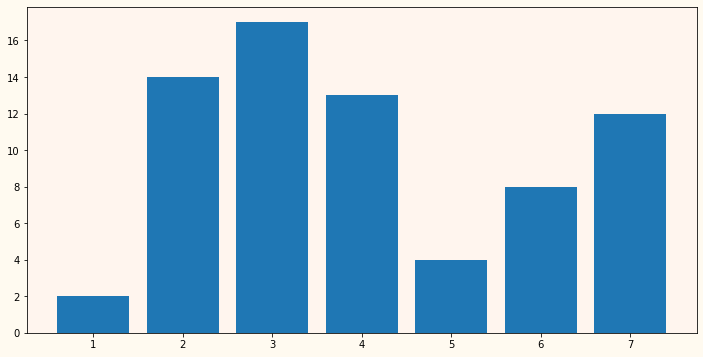

In [4]:
x = np.arange(1, 8)
y = np.random.randint(1, 20, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

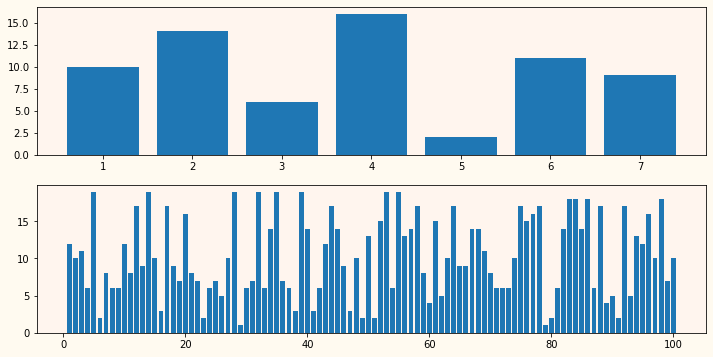

In [5]:
x1 = np.arange(1, 8)
y1 = np.random.randint(1, 20, size = 7)
x2 = np.arange(1, 101)
y2 = np.random.randint(1, 20, size = 100)

fig, axes = plt.subplots(2, 1)

axes[0].bar(x1, y1)
axes[1].bar(x2, y2)

axes[0].set_facecolor('seashell')
axes[1].set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

Ширина прямоугольников подбирается автоматически и нас это, вполне, устраивает. Но если мы имеем дело с несколькими наборами данных, которые нужно отобразить в пределах одной области Axes, то прямоугольники начинают перекрывать друг друга:

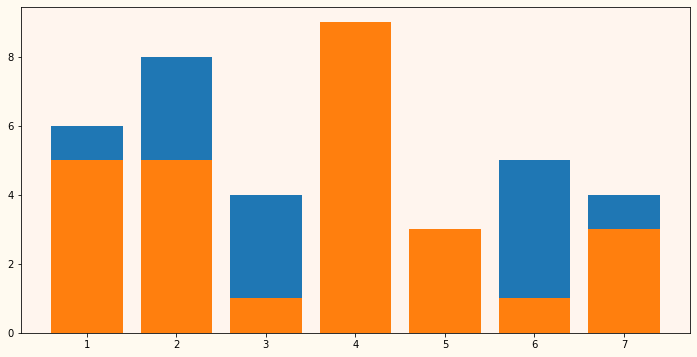

In [6]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

В таких случаях, нам необходимо вручную задавать ширину с помощью параметра width и смещение прямоугольников в массиве x:

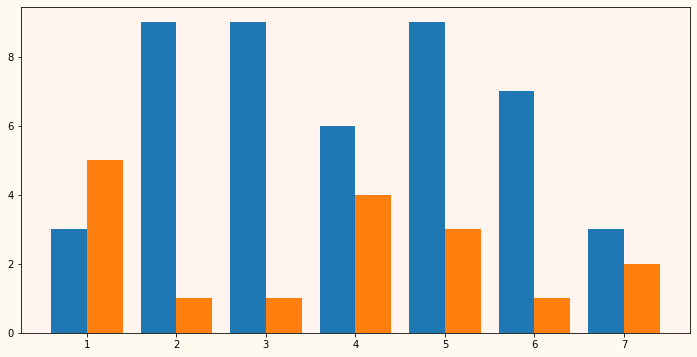

In [7]:
#  Задаем смещение равное половине ширины прямоугольника:
x1 = np.arange(1, 8) - 0.2
x2 = np.arange(1, 8) + 0.2
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)
ax.bar(x2, y2, width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

В некоторых ситуациях ширина прямоугольников, так же как и их высота, может быть пропорциональна некоторой величине. Что бы задать ширину каждого отдельного прямоугольника можно указать параметр **width** в виде массива чисел:

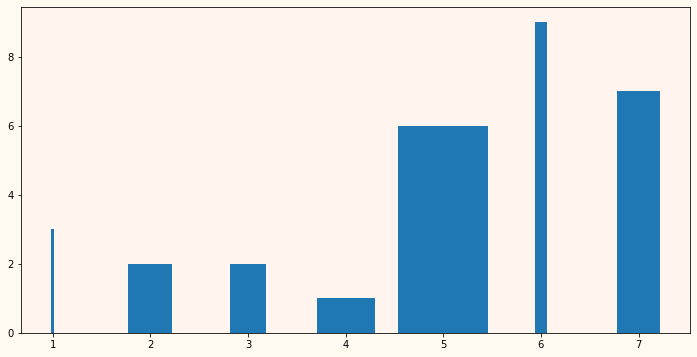

In [8]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

width_rectangle = np.random.rand(7)
ax.bar(x, y, width = width_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

**Выравнивание нижнего края прямоугольников**

Разместить несколько гистограмм на одной области Axes можно не только с помощью горизонтального смещения и изменения ширины прямоугольников, но и с помощью параметра bottom, который задает значение по которому выравнивается нижний край прямоугольников

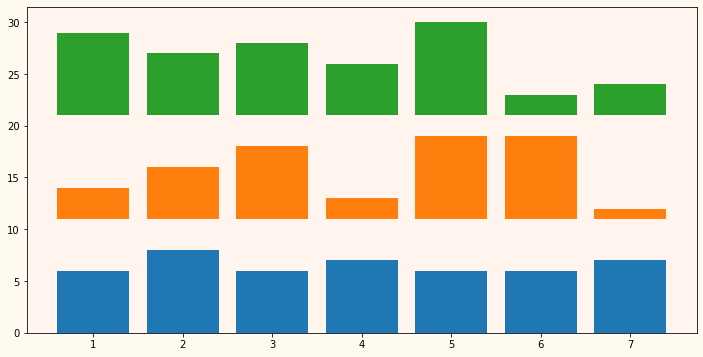

In [9]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)
y3 = np.random.randint(1, 10, size = 7)


fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2, bottom = 11)
ax.bar(x, y3, bottom = 21)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Выравнивание для каждого прямоугольника можно задать с помощью массива:

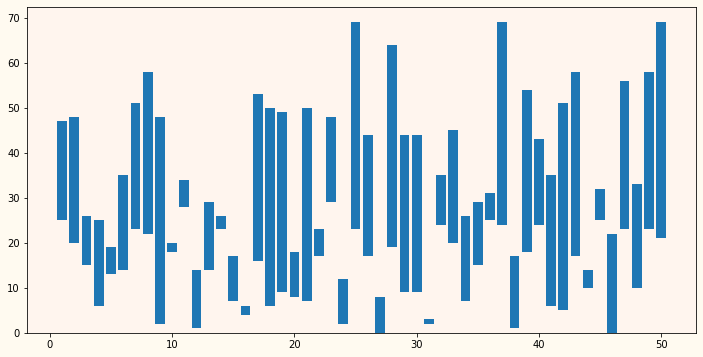

In [10]:
x = np.arange(1, 51)
y = np.random.randint(1, 50, size = 50)

fig, ax = plt.subplots()

bottom_rectangle = np.random.randint(30, size = 50)
ax.bar(x, y, bottom = bottom_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Для того что бы состыковать прямоугольники нескольких наборов данных, достаточно выровнять одни прямоугольники по значениям других:

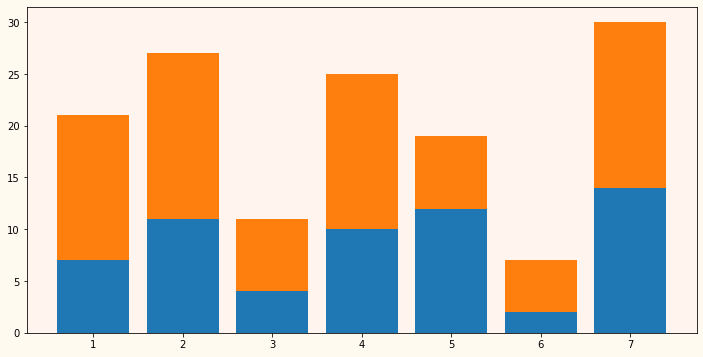

In [11]:
x = np.arange(1, 8)
data_1 = np.random.randint(2, 15, size = 7)
data_2 = np.random.randint(3, 20, size = 7)



fig, ax = plt.subplots()

ax.bar(x, data_1)
ax.bar(x, data_2, bottom = data_1)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

**Цвет**

Для того что бы задать цвет всех прямоугольников достаточно указать его в параметре color:

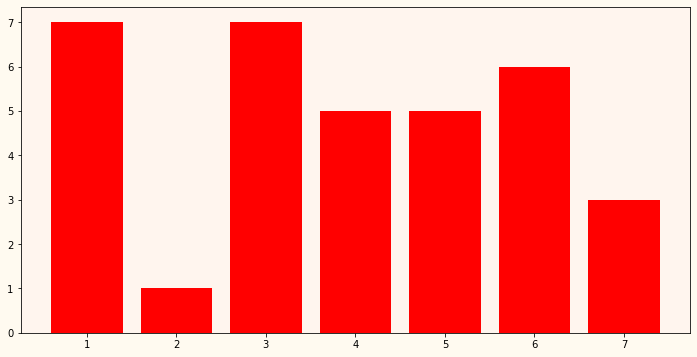

In [12]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)


fig, ax = plt.subplots()

ax.bar(x, y, color = 'red')


fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Так же возможно задать цвет каждого отдельного прямоугольника, указав в параметре **color** массив цветов:

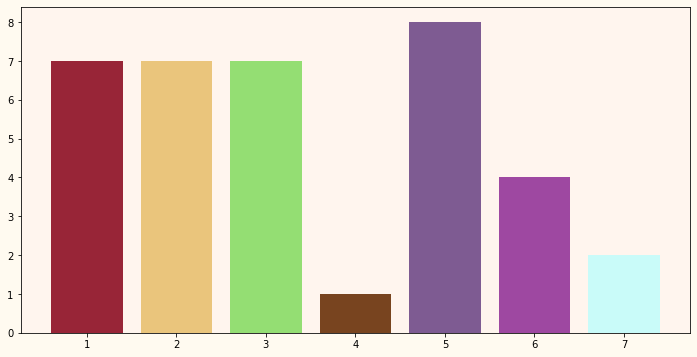

In [13]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y, color = color_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Не забывайте, что matplotlib поддерживает разные цветовые модели и форматы. Задавая цвет в модели RGBA вы можете контролировать прозрачность прямоугольников, что так же позволяет размещать несколько наборов данных, но без смещения:

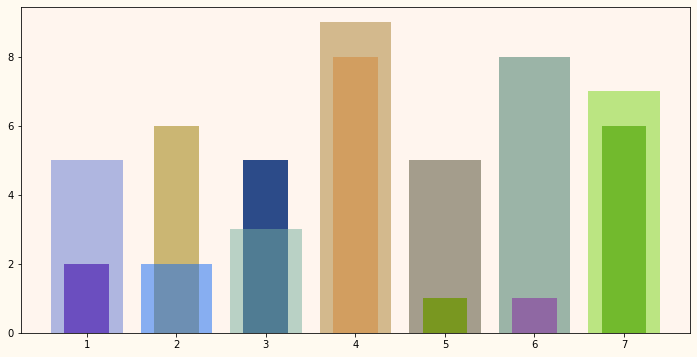

In [14]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y1, color = color_rectangle, width = 0.5)

color_rectangle = np.random.rand(7, 4)    # RGBA
color_rectangle[:,3] = 0.5
ax.bar(x, y2, color = color_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Если вам необходимо выделить границу прямоугольников, то вы можете задать ее цвет (edgecolor) и толщину (linewidth):

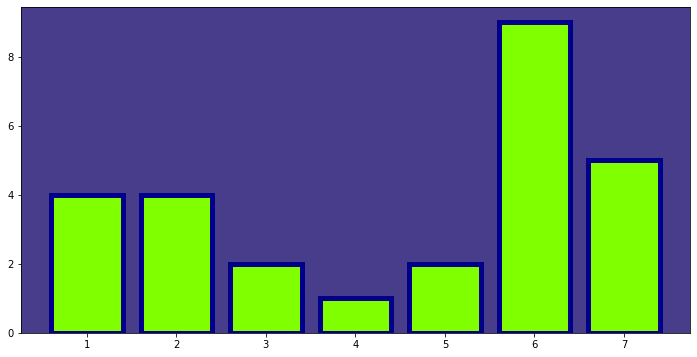

In [15]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y,
       color = 'chartreuse',
       edgecolor = 'darkblue',
       linewidth = 5)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
ax.set_facecolor('darkslateblue')

plt.show()

**Отображение погрешности**

На гистограммах можно указывать погрешность измерения величины, как по горизонтали (xerr) так и вертикали (xerr):

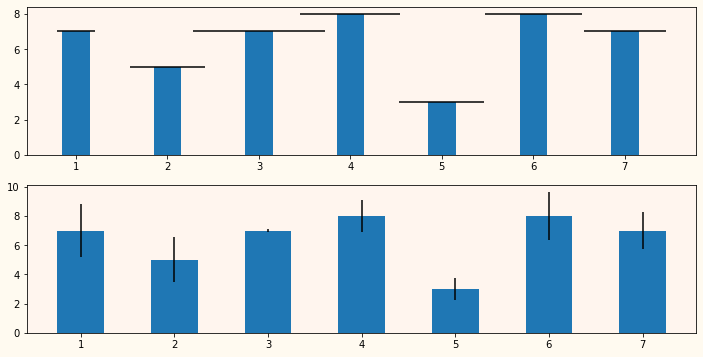

In [16]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)

fig, axes = plt.subplots(2, 1)

x_error = np.random.rand(7)
axes[0].bar(x, y,
            xerr = x_error,
            width = 0.3)

y_error = np.random.rand(7)*2
axes[1].bar(x, y,
            yerr = y_error,
            width = 0.5)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
axes[0].set_facecolor('seashell')
axes[1].set_facecolor('seashell')

plt.show()

Одно число задает одинаковую погрешность, массив чисел длинной x задает разную но симметричную погрешность для каждого прямоугольника, а массив чисел с формой (2, x) задает минимальное и максимальное значение погрешности для каждого прямоугольника:

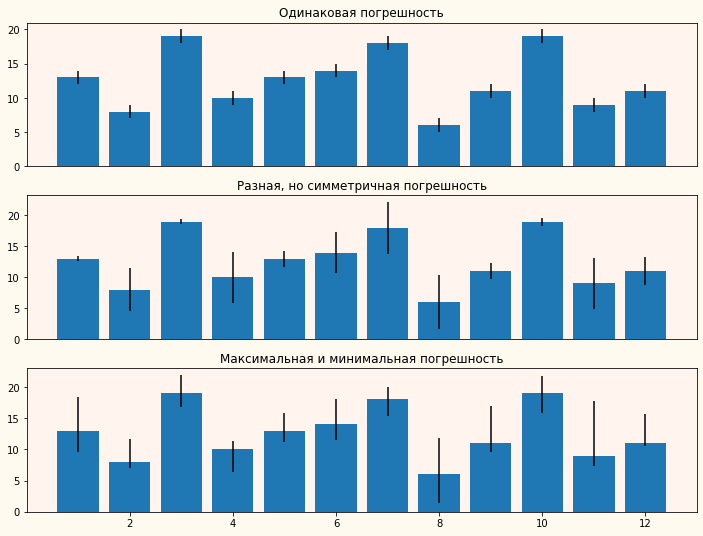

In [17]:
x = np.arange(1, 13)
y = np.random.randint(5, 20, size = 12)

fig, axes = plt.subplots(3, 1)

axes[0].bar(x, y, yerr = 1)

y_error = np.random.rand(12)*5
axes[1].bar(x, y,
            yerr = y_error)

y_error = np.random.rand(2,12)*10
y_error[:][0] /= 2 
axes[2].bar(x, y,
            yerr = y_error)

axes[0].set_title('Одинаковая погрешность')
axes[1].set_title('Разная, но симметричная погрешность')
axes[2].set_title('Максимальная и минимальная погрешность')
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_facecolor('seashell')
axes[1].set_facecolor('seashell')
axes[2].set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(9)    #  высота "Figure"
fig.set_facecolor('floralwhite')

plt.show()

Линии погрешности так же можно видоизменять:

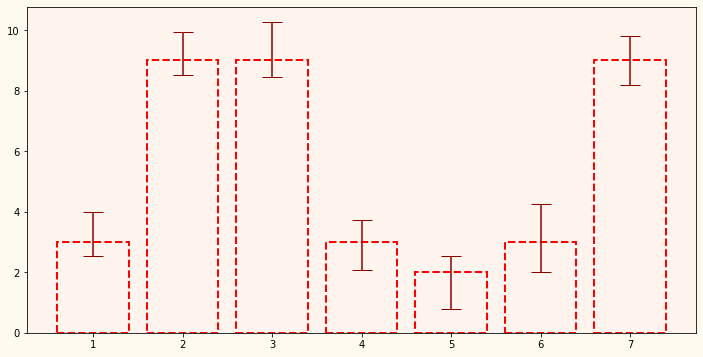

In [18]:
x = np.arange(1, 8)
y = np.random.randint(1, 10, size = 7)


fig, ax = plt.subplots()

y_error = np.random.randint(5, 20, size = (2, 7))/15
ax.bar(x, y, 
       yerr = y_error,      #  границы погрешностей
       ecolor = 'darkred',  #  цвет линии погрешности
       capsize = 10,        #  горизонтальная черточка
       edgecolor = 'red',   #  цвет края прямоугольника
       linewidth = 2,       #  ширина крайней линии
       color = 'seashell',  #  цвет прямоугольника
       linestyle = '--')    #  начертание линии


fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# 5.4. Fill - закрашенный многоугольник

Этот тип графика очень похож на график линии - с помощью двух массивов мы задаем координаты точек, затем концы линии соединяются отрезком и вся область внутри этой замкнутой линии закрашивается. Вот и все.


---



**Несколько примеров**

Давайте сначала нарисуем график линии небольшого массива точек:

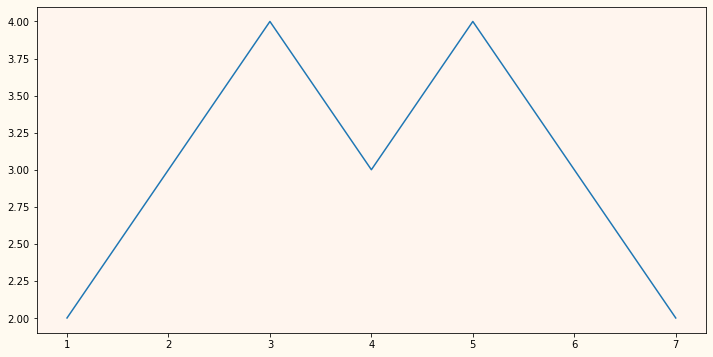

In [19]:
x = [1, 3, 4, 5, 7]
y = [2, 4, 3, 4, 2]

fig, ax = plt.subplots()

ax.plot(x, y)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

А теперь отобразим тот же набор точек с помощью метода **fill**:

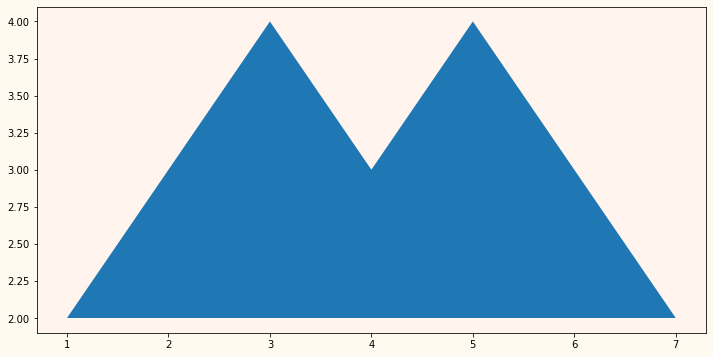

In [20]:
x = [1, 3, 4, 5, 7]
y = [2, 4, 3, 4, 2]


fig, ax = plt.subplots()

ax.fill(x, y)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Как видите - это действительно просто линия с соединенными концами и закрашенной внутренней областью. Методу **fill** можно передавать несколько наборов данных:

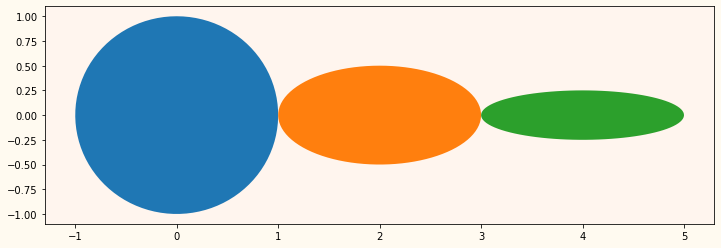

In [21]:
t = np.linspace(0, 2*np.pi, 100)

x = np.sin(t)
y1 = np.cos(t)
y2 = np.cos(t)/2
y3 = np.cos(t)/4

fig, ax = plt.subplots()

ax.fill(x, y1, x + 2, y2, x + 4, y3)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(4)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Указанная линия может пересекать сама себя:

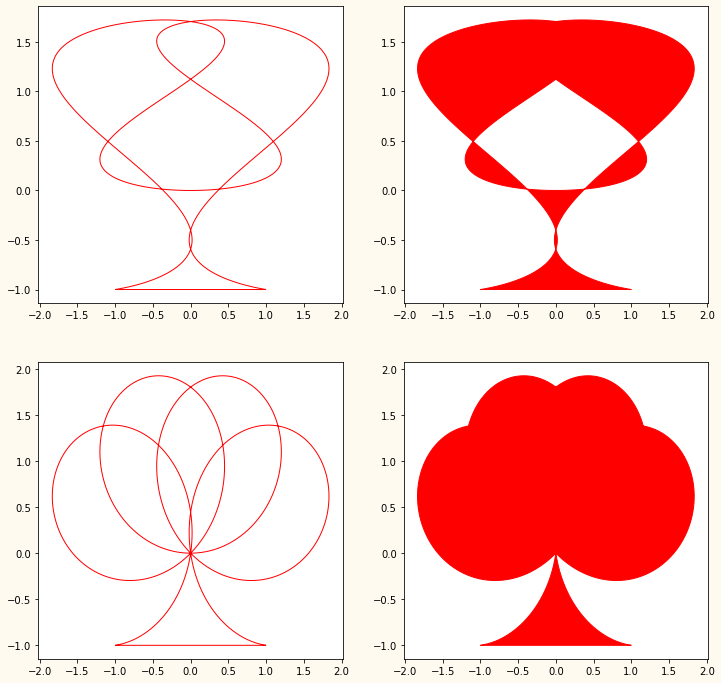

In [22]:
t = np.linspace(0, 2*np.pi, 500)

fig, axes = plt.subplots(2, 2)

x = np.sin(4*t) - np.cos(t/2)
y = np.sin(t/2) - np.cos(2*t)
axes[0][0].fill(x, y, color = 'r',
                fill = False)
axes[0][1].fill(x, y, color = 'r')

x = np.sin(4*t) - np.cos(t/2)
y = np.sin(t/2) - np.cos(4*t)
axes[1][0].fill(x, y,
                color = 'r',
                fill = False)
axes[1][1].fill(x, y,
                color = 'r')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"
fig.set_facecolor('floralwhite')

plt.show()

# 5.5. Fill_between - закрашенная область между линиями

Этот тип графика очень похож на график fill с одним отличием - закрашивается область между двумя указанными линиями.


---



**Несколько примеров**

В простейшем случае, для создания графика, нужно передать методу fill три массива: x - массив с x координатами точек обеих линий и два массива y1, y2 с y координатами точек первой и второй линии:

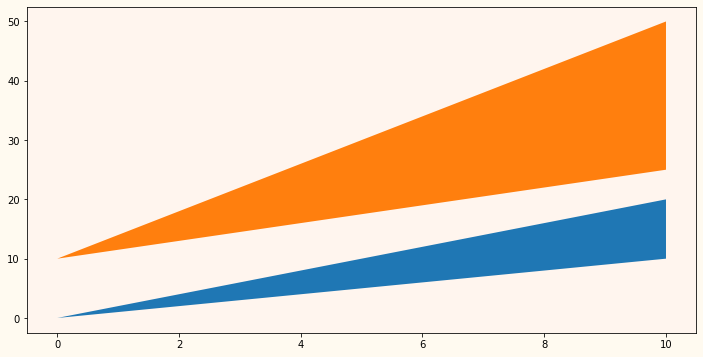

In [23]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 10)

y1 = 2*x
y2 = x
ax.fill_between(x, y1, y2)

y3 = 1.5*x + 10
y4 = 4*x + 10
ax.fill_between(x, y3, y4)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Указанные линии могут пересекать друг друга:

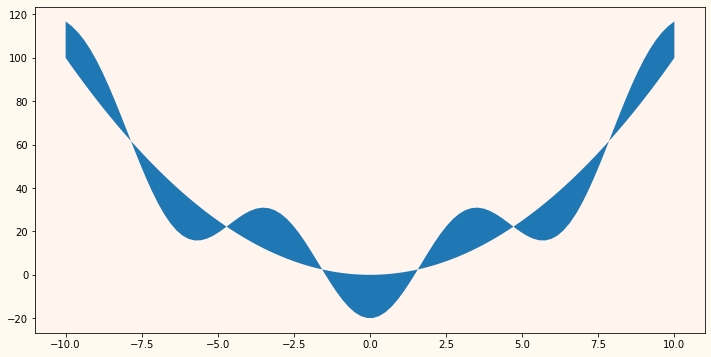

In [24]:
x = np.linspace(-10, 10, 100)
y1 = x**2
y2 = x**2 - 20*np.cos(x)

fig, ax = plt.subplots()

ax.fill_between(x, y1, y2)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Причем, если линии пересекаются, то с помощью параметра **where** можно указать выше или ниже какой линии должна закрашиваться область, а с помощью параметра **facecolor** можно задать ее цвет:

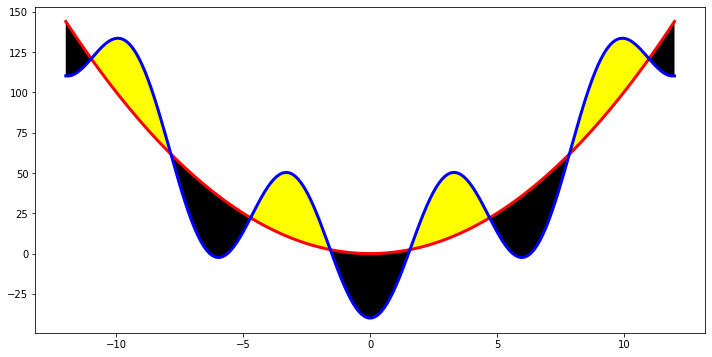

In [25]:
x = np.linspace(-12, 12, 200)
y1 = x**2
y2 = x**2 - 40*np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'r', linewidth = 3)
ax.plot(x, y2, color = 'b', linewidth = 3)

ax.fill_between(x, y1, y2,
                where= (y2 > y1),
                facecolor='yellow')
ax.fill_between(x, y1, y2,
                where= (y2 < y1),
                facecolor='black')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Можно управлять цветом и другими параметрами линии, а так же устанавливать прозрачность всей области:

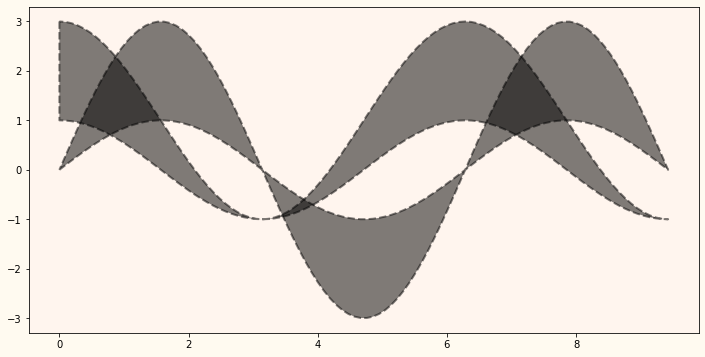

In [26]:
x = np.linspace(0, 3*np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)

fig, ax = plt.subplots()

ax.fill_between(x, y1, 2*y1 + 1,
                facecolor='r',
                alpha = 0.5,
                color = 'black',    #  цвет линий
                linewidth = 2,      #  ширина линий
                linestyle = '--')   #  начертание линий
ax.fill_between(x, y2, 3*y2,
                facecolor='g',
                alpha = 0.5,
                color = 'black',
                linewidth = 2,
                linestyle = '--')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# 5.6. Stackplot - надставленные области


Данный график очень похож на fill_between, но в отличии от него, он может создавать области между несколькими линиями и позволяет определить как эти области должны выравниваться относительно друг-друга.


---



Чтобы построить график, методу **stackplot** необходимо всего два аргумента: массив с координатами x и массивы c y координатами линий. Вот только отсчет y координат каждой последующей линии ведется от y координат предыдущей линии:

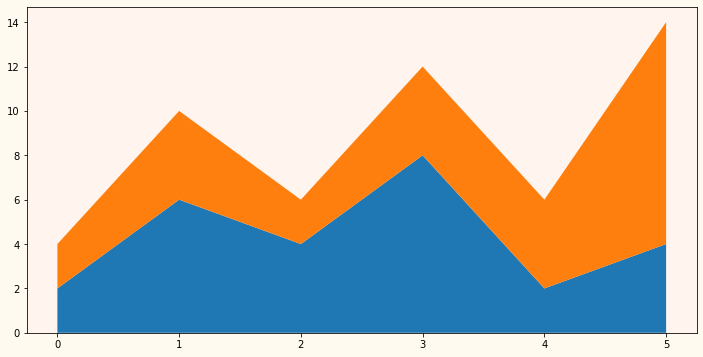

In [27]:
x = [0, 1, 2, 3, 4, 5]

y1 = [2, 6, 4, 8, 2, 4]
y2 = [2, 4, 2, 4, 4, 10]

#  Фактические координаты y2 = [4, 10, 6, 12, 6, 14]

fig, ax = plt.subplots()

ax.stackplot(x, [y1, y2])

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Наличие в данных отрицательных значений может привести к двусмысленности:

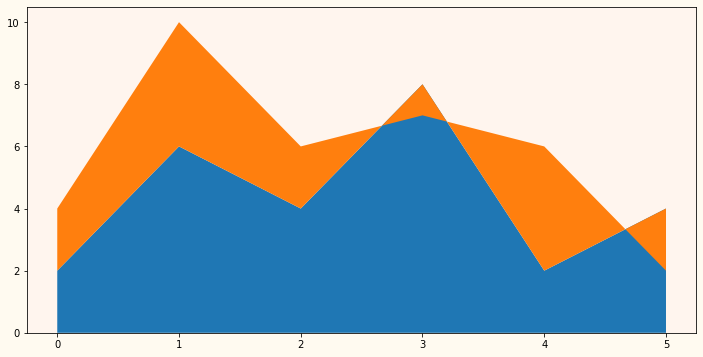

In [28]:
x = [0, 1, 2, 3, 4, 5]

y1 = [2, 6, 4, 8, 2, 4]
y2 = [2, 4, 2, -1, 4, -2]

#  Фактические координаты y2 = [4, 10, 6, 7, 6, 2]

fig, ax = plt.subplots()

ax.stackplot(x, [y1, y2])

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

В качестве второго аргумента может выступать массив из массивов y-координат:

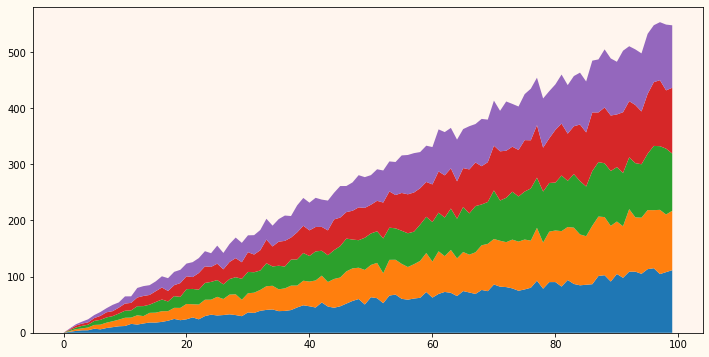

In [29]:
x = np.arange(100)
y = np.random.rand(5, 100)*x**(2/3)+x

fig, ax = plt.subplots()

ax.stackplot(x, y)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

**Выравнивание областей**

Выровнять области можно несколькими способами, указав в аргументе baseline одну из следующих строк: 'zero', 'sym', 'wiggle', 'weighted_wiggle'. Если указать способ 'zero', то выравнивание следующей линии будет рассчитано относительно предыдущей (установлено по умолчанию):

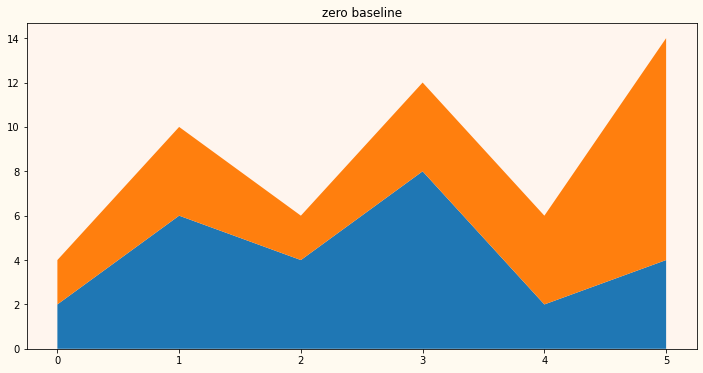

In [30]:
x = [0, 1, 2, 3, 4, 5]

y1 = [2, 6, 4, 8, 2, 4]
y2 = [2, 4, 2, 4, 4, 10]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, baseline = 'zero')

ax.set_title('zero baseline')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Всю область можно выровнять так, что ее края будут симметричны относительно нулевой линии, для этого необходимо указать строку **'sym'**:

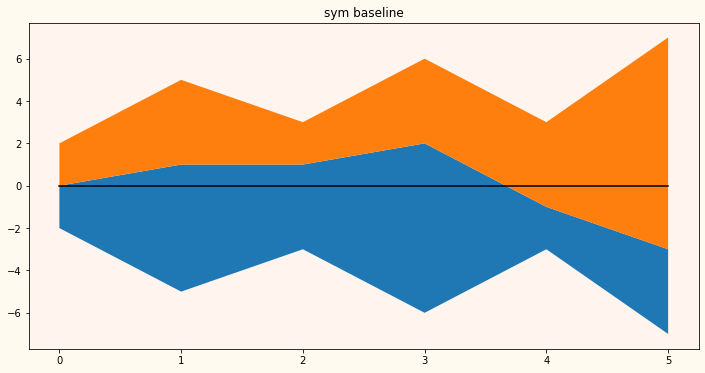

In [31]:
x = [0, 1, 2, 3, 4, 5]

y1 = [2, 6, 4, 8, 2, 4]
y2 = [2, 4, 2, 4, 4, 10]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, baseline = 'sym')
ax.plot(np.zeros(6), color = 'black')

ax.set_title('sym baseline')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Метод выравнивания **'wiggle'** позволяет добиться минимального наклона краев области:

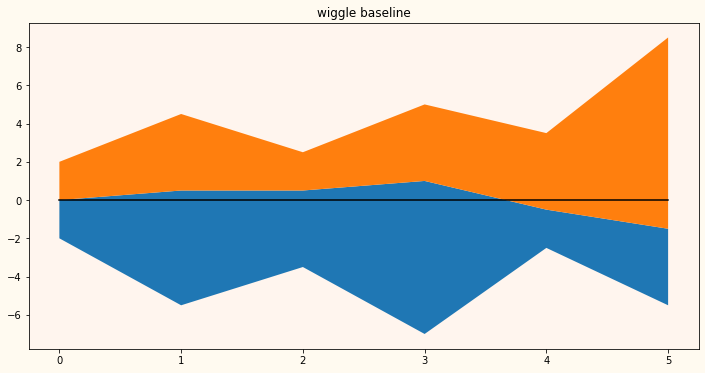

In [32]:
x = [0, 1, 2, 3, 4, 5]

y1 = [2, 6, 4, 8, 2, 4]
y2 = [2, 4, 2, 4, 4, 10]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, baseline = 'wiggle')

ax.plot(np.zeros(6), color = 'black')

ax.set_title('wiggle baseline')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Последний способ выравнивания - **'weighted_wiggle'**, так же как и метод расчета **'zero'** выравнивает одну линию относительно предыдущей, но смещает саму область пропорционально ширине каждого полученного слоя:

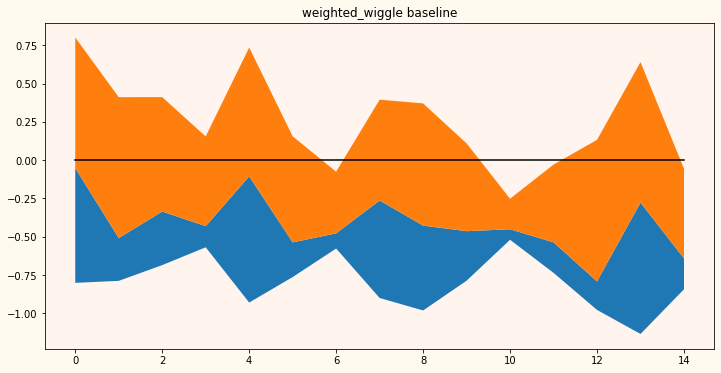

In [33]:
x = np.arange(15)

y1 = np.random.rand(15)
y2 = np.random.rand(15)

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2,
             baseline = 'weighted_wiggle')
ax.plot(np.zeros(15), color = 'black')

ax.set_title('weighted_wiggle baseline')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Данный вид графиков очень похож на гистограммы, только в отличии от них, каждая величина пропорциональна не прямоугольнику а слою. А различные методы расчета смещения базовой линии позволяют в различной степени "почувствовать энергию" каждого слоя. Давайте создадим искусственные данные и посмотрим, как они могут выглядеть:

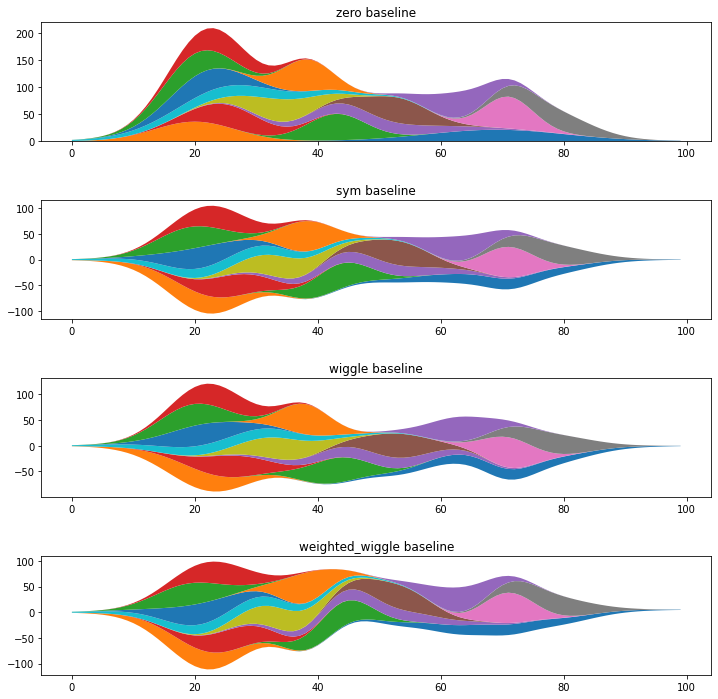

In [34]:
def gaus_mix(n):
    a = np.zeros(n)
    x = np.random.randint(20, 60, size = 1)
    y = 0.01*np.random.randint(5, 95, size = 1)
    z = 0.3*x
    for i in range(n):
            w = (i / float(n) - y) * z
            a[i] += x * np.exp(-w * w)
    return a

x = np.arange(100)
y = []
for i in range(15):
    y.append(gaus_mix(100))

fig, axes = plt.subplots(4, 1)

axes[0].stackplot(x, y,
             baseline = 'zero')
axes[1].stackplot(x, y,
             baseline = 'sym')
axes[2].stackplot(x, y,
             baseline = 'wiggle')
axes[3].stackplot(x, y,
             baseline = 'weighted_wiggle')

axes[0].set_title('zero baseline')
axes[1].set_title('sym baseline')
axes[2].set_title('wiggle baseline')
axes[3].set_title('weighted_wiggle baseline')

#  Увеличим расстояние между областями Axes:
fig.subplots_adjust(hspace=0.5)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

Так же, в отличии от гистограмм, данный вид графиков позволяет отлично визуализировать соотношение непрерывных величин на протяженном промежутке времени, например, объемы выпуска автомобилей различными компаниями за последние 40 лет.

# 5.7. Imshow - картинки

Как работать с изображениями? В последнее время это очень частый вопрос. Matplotlib позволяет не только отображать двумерные массивы, но и загружать их в виде массивов NumPy, что на самом деле очень удобно.


---



**Простейший случай**

В самом простом случае, изображение можно представить в виде двумерного массива чисел:

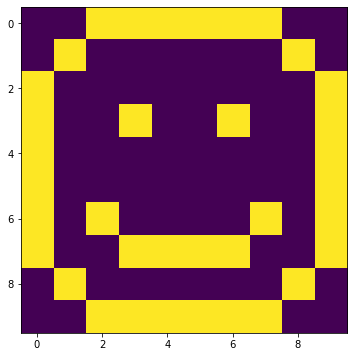

In [36]:
#  Двумерный массив пикселей:
smile = [[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
         [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]]

fig, ax = plt.subplots()

ax.imshow(smile)

fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Как видите в этом действительно нет ничего сложного - количество строк и столбцов в массиве это высота и ширина изображения, а каждое число в массиве соответствует определенному цвету из встроенной палитры. Как правило, числа, должны находиться в интервале [0, 1]. Если вы указываете целые числа, то все они будут автоматически нормализованы и приведены к данному интервалу, в чем очень легко убедиться:

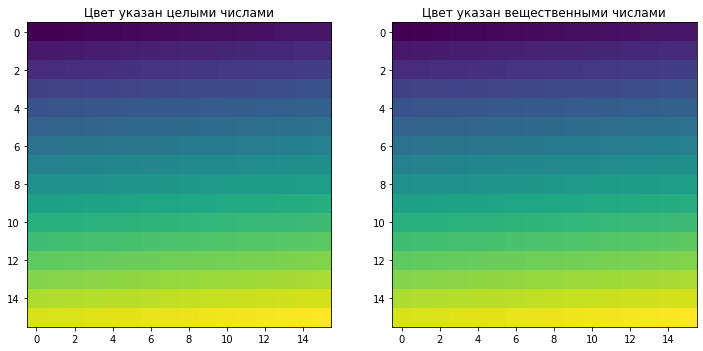

In [37]:
data_int = np.arange(0, 256).reshape(16, 16)
data_float = np.linspace(0, 1, 256).reshape(16, 16)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(data_int)
axes[0].set_title('Цвет указан целыми числами')

axes[1].imshow(data_float)
axes[1].set_title('Цвет указан вещественными числами')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Нередко, бывает очень полезным отобразить в виде изображения график некоторой трехмерной функции **z = f(x, y)**, на котором каждому значению z соответствует определенный цвет:

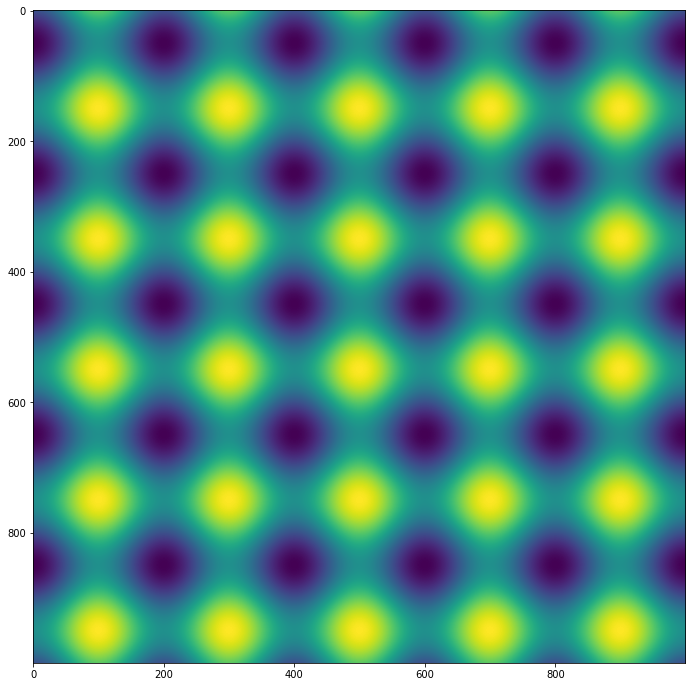

In [38]:
x, y = np.mgrid[-5*np.pi:5*np.pi:1000j,
                -5*np.pi:5*np.pi:1000j]

z = np.sin(x) + np.cos(y)

fig, ax = plt.subplots()

ax.imshow(z)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

# 5.8. Contour - линии уровней

Иногда приходится иметь дело с трехмерными поверхностями, т.е. результатом табулирования функции от двух переменных **z = f(x, y)**. Сейчас, как правило, с восприятием таких графиков нет никаких проблем - есть много способов создать интерактивный трехмерный график, который можно вертеть и масштабировать как угодно. Но если мы говорим о статичной картинке, то с пониманием графика возникают некоторые трудности. Выход нашли еще до появления компьютеров, при издании технической литературы, который заключается в том что строят не трехмерный график а его отображение на плоскости. Это отображение получают по следующим правилам: берут заданное количество плоскостей параллельных плоскости xy и выделяют место пересечения поверхности с каждой из этих плоскостей - контуры, затем проецируют данные контуры на плоскость xy и все график готов.


---



**Несколько примеров**

Давайте разберемся на примере какой нибудь реальной функции от двух переменных, скажем **z = np.sinc(x) + np.cos(y)**:

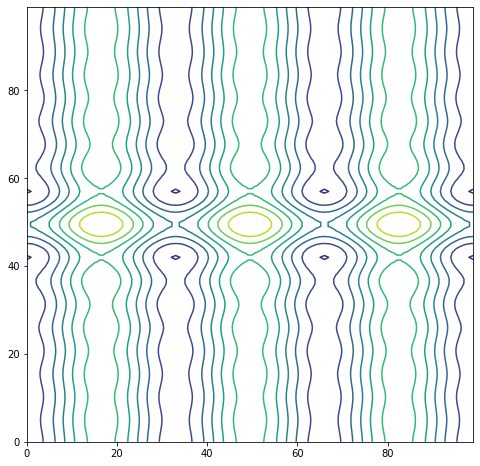

In [40]:
x, y = np.mgrid[-3*np.pi:3*np.pi:100j,
                -3*np.pi:3*np.pi:100j]
z = np.sinc(x) + np.cos(y)

fig, ax = plt.subplots()

ax.contour(z)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Количество контуров можно увеличить с помощью параметра **levels**:

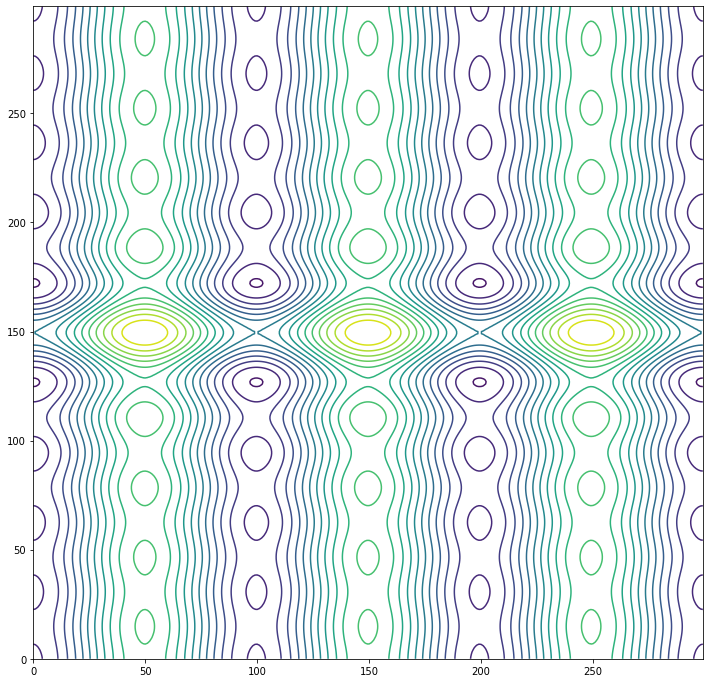

In [41]:
x, y = np.mgrid[-3*np.pi:3*np.pi:300j,
                -3*np.pi:3*np.pi:300j]
z = np.sinc(x) + np.cos(y)

fig, ax = plt.subplots()

ax.contour(z, levels = 20)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

**Цвет линий**

Цвет линий определяется автоматически на основе, установленной по умолчанию, палитры. С помощью параметра **colors** мы можем задать один цвет для всех линий или, что очень важно для физиков и инженеров, цвет каждой линии. В случае, если необходимо определить цвет каждой линии, то параметру **colors ** необходимо присвоить массив длинна которого соответствует количеству линий **(levels)** а каждый элемент определенному цвету. Давайте рассмотрим график напряженности электрического поля два электрических заряда:

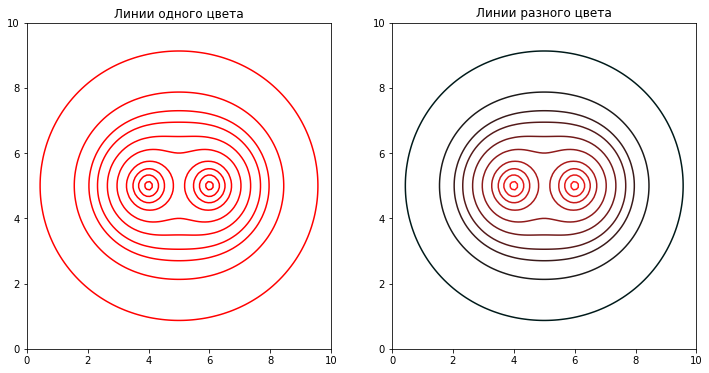

In [42]:
x, y = np.mgrid[0:10:100j, 0:10:100j]

#  Вычисляем напряженность электрического
#  поля двух зарядов в каждой точке плоскости:
x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, axes = plt.subplots(1, 2)

#  Задаем значение каждого уровня:
lev = [1, 2, 3, 4, 6, 10, 20, 40, 100, 900]

#  Контуры одного цвета:
axes[0].contour(x, y, E, levels = lev,
           colors = 'r')
axes[0].set_title('Линии одного цвета')

#  Создаем массив RGB цветов каждого уровня:
color_line = np.zeros((10, 3))
color_line[:, 1:] = 0.1
color_line[:, 0] = np.linspace(0, 1, 10)

#  Контуры разного цвета:
axes[1].contour(x, y, E, levels = lev,
           colors = color_line)
axes[1].set_title('Линии разного цвета')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

**Contourf - область между контурами**

Если области между контурами будут заполнены разными цветами то мы добьемся того же самого результата. Метод **contourf** выделяет контуры не линиями, а цветом областей между ними:

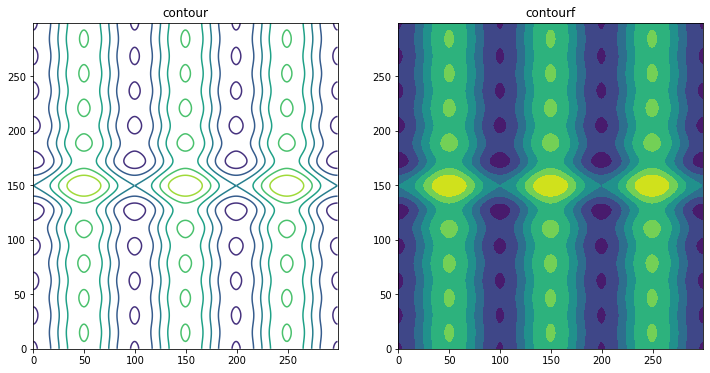

In [43]:
x, y = np.mgrid[-3*np.pi:3*np.pi:300j,
                -3*np.pi:3*np.pi:300j]
z = np.sinc(x) + np.cos(y)

fig, axes = plt.subplots(1, 2)

axes[0].contour(z)
axes[0].set_title('contour')

axes[1].contourf(z)
axes[1].set_title('contourf')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Так же как и с contour мы можем задавать количество уровней и их цвет с помощью параметров **levels** и **colors**:

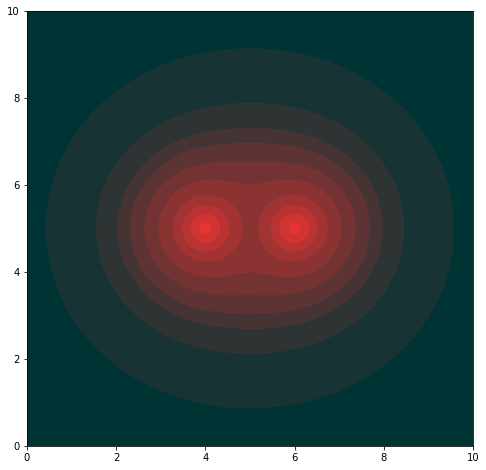

In [44]:
x, y = np.mgrid[0:10:100j, 0:10:100j]

x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, ax = plt.subplots()

#  Задаем значение каждого уровня:
lev = [0, 1, 2, 3, 4, 6, 10, 20, 40, 100, 900, 10000]

#  Создаем массив RGB цветов каждой области:
color_region = np.zeros((12, 3))
color_region[:, 1:] = 0.2
color_region[:, 0] = np.linspace(0, 1, 12)

ax.contourf(x, y, E,
            levels = lev,
            colors = color_region)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**clabel - метки контуров**

Каждому контуру соответствует определенное значение величины. Отобразить это значение в виде меток можно с помощью метода **clabel**. В самом простом случае, данный метод принимает всего один аргумент - объект **ContourSet**, возвращаемый методом **contour**:

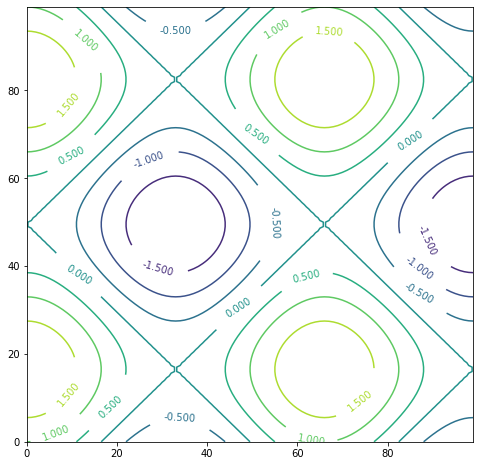

In [45]:
x, y = np.mgrid[0:3*np.pi:100j,
                0:3*np.pi:100j]
z = np.sin(x) + np.cos(y)

fig, ax = plt.subplots()

cs = ax.contour(z)

ax.clabel(cs)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Однако, если тоже самое попробовать сделать с областями между контурами **(contourf)**, то ничего не получится. Точнее получится, но будет выглядеть вот так:

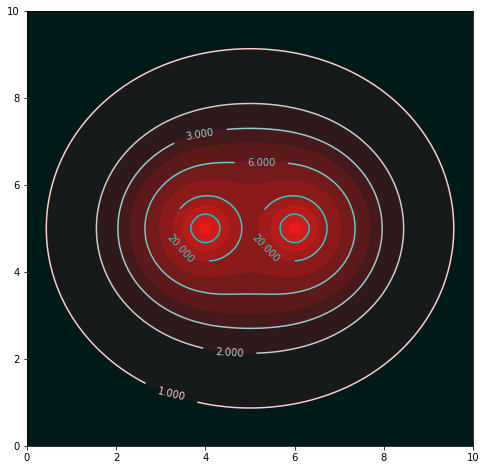

In [46]:
x, y = np.mgrid[0:10:100j, 0:10:100j]

x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, ax = plt.subplots()

###  Строим contourf  ###
#  Задаем количество областей:
lev_region = [0, 1, 2, 3, 4, 6, 10, 20, 40, 100, 900, 10000]
#  Задаем цвет каждой области:
color_fill = np.zeros((12, 3))
color_fill[:, 1:] = 0.1
color_fill[:, 0] = np.linspace(0, 1, 12)

ax.contourf(x, y, E,
            levels = lev_region,
            colors = color_fill)

###  Строим contour  ###
#  Задаем количество линий:
lev_line = [1, 2, 3, 6, 20, 100]
#  Задаем цвет линий:
color_line = np.zeros((6, 3))
color_line[:, 1:] = 0.8
color_line[:, 0] = np.linspace(1, 0, 6)

CS = ax.contour(x, y, E,
                levels = lev_line,
                colors = color_line)

ax.clabel(CS)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Обратите внимание на то, что количество областей и линий в contourf и contour не совпадает - это позволяет определять какие уровни помечать меткой а какие нет.

# 5.9. Pcolormesh - псевдоцветная сетка

Мы уже видели, что с помощью метода **imshow** можно отображать двумерные массивы в виде изображений. Однако, иногда возникает необходимость не отображать определенные ячейки (пиксели) или сделать так что бы ячейки были разного размера. Так же иногда необходимо отображать саму границу между ячейками. Для таких нужд нам и пригодится метод **pcolormesh**.


---



**Несколько примеров**

В самом простом случае метод pcolormesh принимает всего один аргумент - двумерный массив чисел:

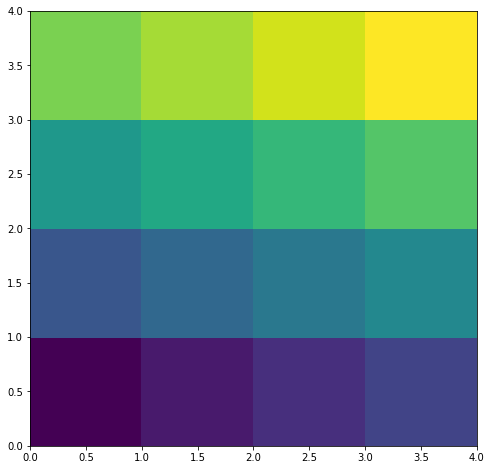

In [47]:
c = [[ 0, 1, 2, 3],
     [ 4, 5, 6, 7],
     [ 8, 9, 10, 11],
     [12, 13, 14, 15]]

fig, ax = plt.subplots()

ax.pcolormesh(c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Мы можем легко задавать размеры ячеек. Как это работает легче всего разобрать на графике с небольшим количеством ячеек:

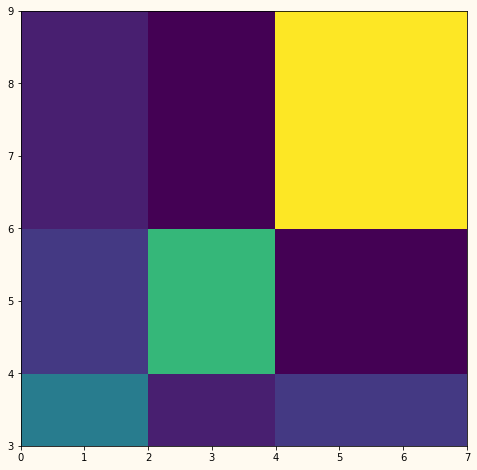

In [48]:
c = [[5, 1, 2],
     [2, 8, 0],
     [1, 0, 12]]

x = [0, 2, 4, 7]
y = [3, 4, 6, 9]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

В этом примере мы указали еще два параметра - массив x и массив y, которые на 1 больше длинны и ширины массива c. Эти массивы и задают ширину столбцов и высоту строк сетки и благодаря им можем записать координаты углов каждой ячейки, например, координаты самой левой нижней ячейки запишутся как:

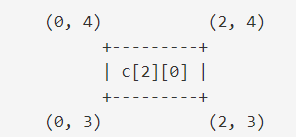



Или в общем случае для каждой ячейки:

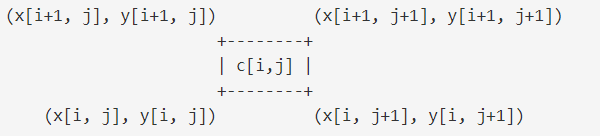

Массивы x и y могут и совпадать с длинной и шириной массива c, но в этом случае последний столбец и последняя строка массива c будут игнорироваться:

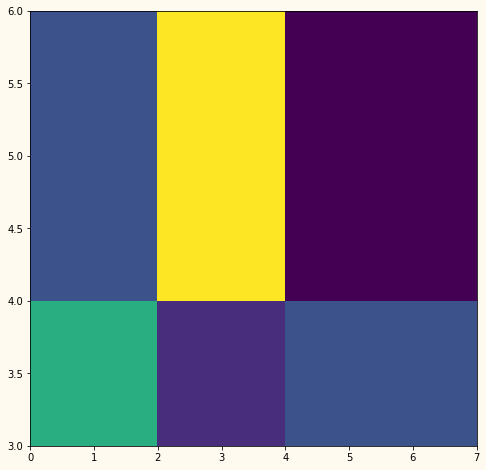

In [49]:
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

#  Длинна x и y совпадает с длиной
#  и шириной c:
x = [0, 2, 4, 7]
y = [3, 4, 6]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Более того, ячейки даже не обязаны быть прямоугольными:

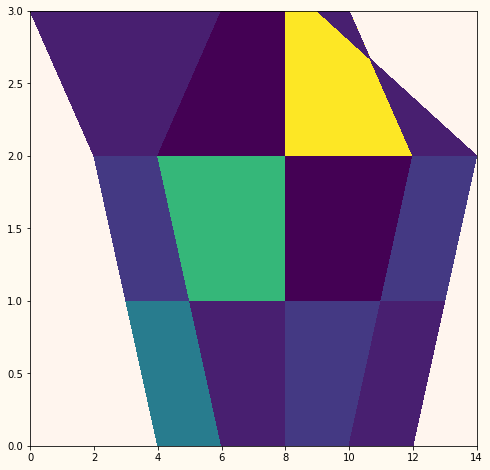

In [50]:
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [0, 6, 8, 10, 9]]

y = [0, 1, 2, 3]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

И еще один пример, в котором ячейки имеют неправильную форму:

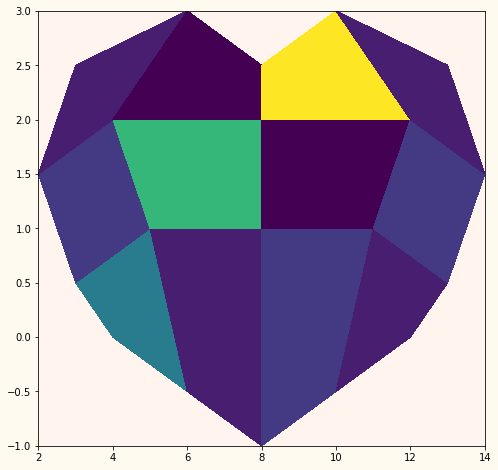

In [51]:
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [3, 6, 8, 10, 13]]

y = [[0,-0.5,-1,-0.5,0],
     [0.5,1,1,1,0.5],
     [1.5,2,2,2,1.5],
     [2.5,3,2.5,3,2.5]]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Как видите, форму каждой ячейки мы задали сначала одним двумерным массивом x, а во втором случае с помощью двумерных массивов x и y. В первом примере видно, что ячейки могут даже перекрывать друг друга, т.е. фактически, единственное за чем нужно следить, так это за совместимостью размеров массивов x и y. Если их размеры совместимы, то само содержание массивов может быть каким угодно даже случайным:

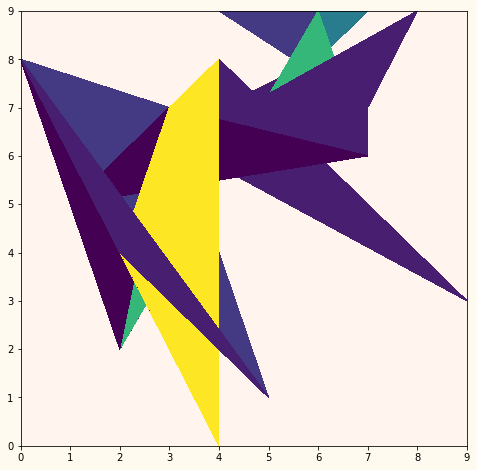

In [52]:
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = np.random.randint(0, 10, size = (4, 5))
y = np.random.randint(0, 10, size = (4, 5))

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

**Прозрачность**

В случае неравномерной сетки ячейки действительно могут перекрывать друг друга, в этом легко убедиться, если добавить параметр alpha, который задает прозрачность ячеек и может принимать значение из интервала [0, 1]:


---



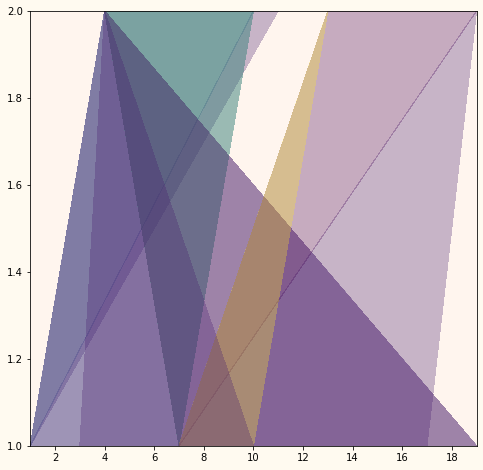

In [53]:
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = np.random.randint(1, 20, size = (4, 5))

y = np.random.randint(1, 3, size = (4, 5))

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c, alpha = 0.3)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

**Линии сетки**

Задать цвет линий сетки а так же их параметры можно с помощью множества параметров. Цвет задается параметром edgecolors, а их ширину с помощью параметра linewidth


---



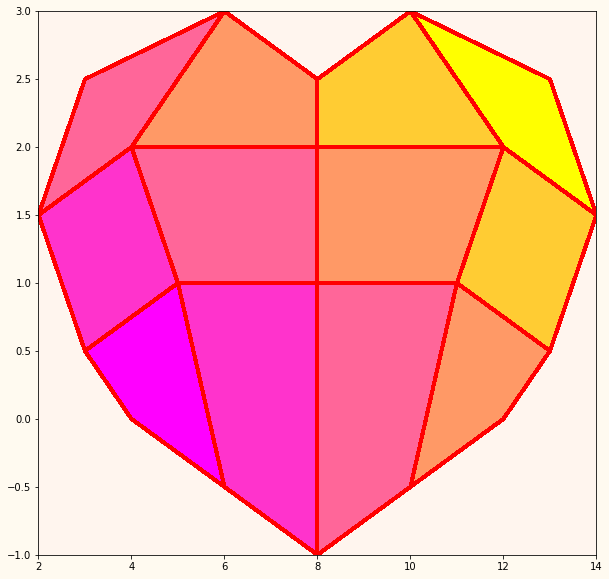

In [54]:
c = [[0, 1, 2, 3],
     [1, 2, 3, 4],
     [2, 3, 4, 5]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [3, 6, 8, 10, 13]]

y = [[0,-0.5,-1,-0.5,0],
     [0.5,1,1,1,0.5],
     [1.5,2,2,2,1.5],
     [2.5,3,2.5,3,2.5]]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c,
              cmap = 'spring',
              edgecolors = 'r',
              linewidth = 3)

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# 5.10. Arrow - стрелка

Если необходимо сфокусировать внимание на определенном участке графика - то это проще всего сделать с помощью стрелок:

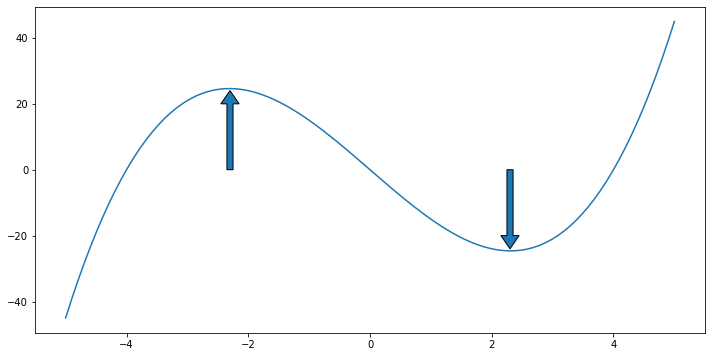

In [55]:
x = np.linspace(-5, 5, 100)
y = x*(x - 4)*(x + 4)



fig, ax = plt.subplots()

ax.plot(x, y)
ax.arrow(-2.3, 0, 0, 20,
         width = 0.1,
         head_length = 4)
ax.arrow(2.3, 0, 0, -20,
         width = 0.1,
         head_length = 4)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

**Параметры отображения**

В самом простом случае стрелка задается всего четырьмя параметрами:

1. x, y - координаты начала стрелки;

2. dx, dy - длина стрелки по оси x и y.

Но при этом сама стрелка не совсем похожа на стрелку:

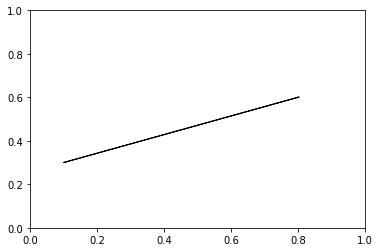

In [56]:
fig, ax = plt.subplots()

ax.arrow(0.1, 0.3, 0.7, 0.3)

plt.show()

Более того, даже если нас устраивает такой вид стрелки, она будет рисоваться только в области Axes ограниченной нулем и единицей:

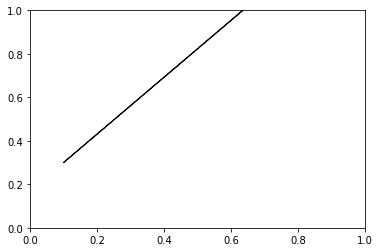

In [57]:
fig, ax = plt.subplots()

ax.arrow(0.1, 0.3, 1.3, 1.7)

plt.show()

Такое поведение стрелки меняется если диапазон значений x и y задан другим методом Axes или если он изменен вручную. Ну а придать стрелке "нормальный" вид можно, указав в параметре width какое-нибудь значение (желательно, небольшое так как по умолчанию width = 0.001):

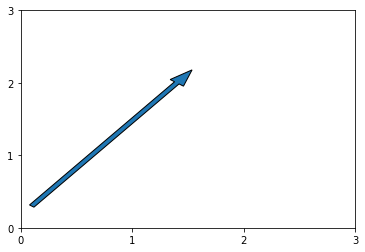

In [58]:
fig, ax = plt.subplots()

ax.arrow(0.1, 0.3, 1.3, 1.7,
         width = 0.05)    #  ширина стрелки

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

**Параметры отображения**

Рано или поздно вы заметите, что длина стрелки не включает в себя длину острия. Изменить такое поведение можно с помощью параметра **length_includes_head** установленным в True:

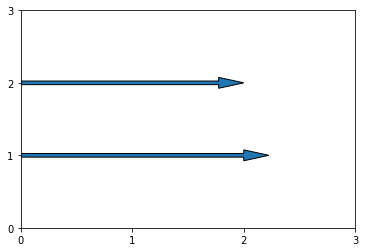

In [59]:
fig, ax = plt.subplots()

ax.arrow(0, 1, 2, 0,
         width = 0.05)

#  Длина стрелки будет включать в себя
#  длину острия:
ax.arrow(0, 2, 2, 0,
         length_includes_head = True,
         width = 0.05)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

Ширина острия стрелки по умолчанию равно трем значениям ширины ее основной линии. С помощью параметра **head_width** можно установить произвольное значение ширины острия:

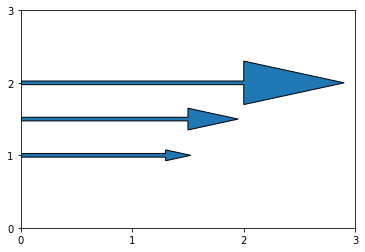

In [60]:
fig, ax = plt.subplots()

ax.arrow(0, 1, 1.3, 0,
         width = 0.05)

#  head_width - ширина острия стрелки:
ax.arrow(0, 1.5, 1.5, 0,
         head_width = 0.3,
         width = 0.05)
ax.arrow(0, 2, 2, 0,
         head_width = 0.6,
         width = 0.05)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

Параметр **head_length** позволяет задать длину острия стрелки (по умолчанию длина острия равна 3/2 от ширины острия):

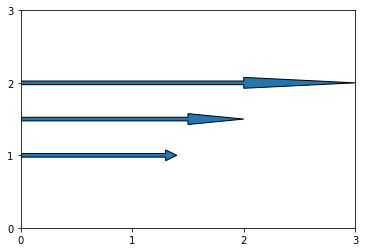

In [61]:
fig, ax = plt.subplots()

#  head_length - длина острия стрелки:
ax.arrow(0, 1, 1.3, 0,
         head_length = 0.1,
         width = 0.05)
ax.arrow(0, 1.5, 1.5, 0,
         head_length = 0.5,
         width = 0.05)
ax.arrow(0, 2, 2, 0,
         head_length = 1,
         width = 0.05)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

С помощью параметра **shape** мы можем выбирать: рисовать ли стрелку полностью или только какую-то ее половину:

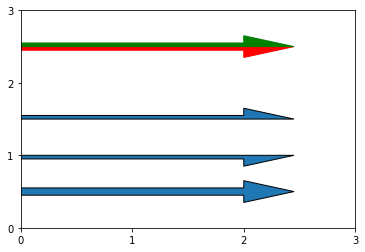

In [62]:
fig, ax = plt.subplots()

#  shape - форма стрелки:
ax.arrow(0, 0.5, 2, 0,
         shape = 'full',    #  по умолчанию
         width = 0.1)
ax.arrow(0, 1, 2, 0,
         shape = 'left',
         width = 0.1)
ax.arrow(0, 1.5, 2, 0,
         shape = 'right',
         width = 0.1)

#  color - задает цвет стрелки:
ax.arrow(0, 2.5, 2, 0,
         shape = 'left',
         color = 'r',
         width = 0.1)
ax.arrow(0, 2.5, 2, 0,
         shape = 'right',
         color = 'g',
         width = 0.1)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

Выровнять основание острия можно с помощью параметра **overhang**:

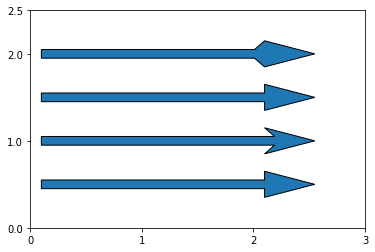

In [63]:
fig, ax = plt.subplots()

ax.arrow(0.1, 0.5, 2, 0,
         width = 0.1)

#  overhang - выравнивание края
#  стрелки:
ax.arrow(0.1, 1, 2, 0,
         overhang = 0.2,
         width = 0.1)
ax.arrow(0.1, 1.5, 2, 0,
         overhang = 0,
         width = 0.1)
ax.arrow(0.1, 2, 2, 0,
         overhang = -0.2,
         width = 0.1)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 2.5])

plt.show()



---

**Цвет стрелки и ее края**

В одном из примеров мы уже устанавливали цвет стрелки с помощью параметра color, но он переопределяет цвет края стрелки. Поэтому, в этом случае мы должны указать цвет стрелки с помощью параметра facecolor:

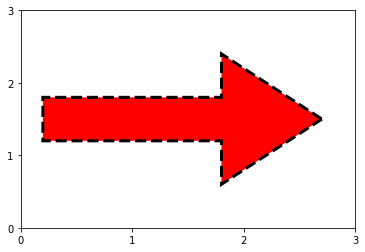

In [64]:
fig, ax = plt.subplots()

ax.arrow(0.2, 1.5, 2.5, 0,
         facecolor = 'red',    #  цвет стрелки
         edgecolor = 'black',  #  цвет края
         linewidth = 3,        #  ширина линии края
         linestyle = '--',     #  начертание линии
         width = 0.6,
         head_length = 0.9,
         length_includes_head = True)



#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

# 5.11. Quiver - поле векторов

Стрелки очень удобны тем, что позволяет изображать функцию от двух переменных z = f(x, y) в виде плоскости с множеством векторов, каждый из которых указывает значение и направление некоторой величины.


---



**Несколько примеров**

В самом простом случае, метод quiver принимает всего два аргумента - значениями которых являются два двумерных массива одинакового размера:

* U - массив длин стрелок по оси x;

* V - массив длин стрелок по оси y.

Посмотрите на три следующих примера и вы сразу поймете как строятся стрелки:

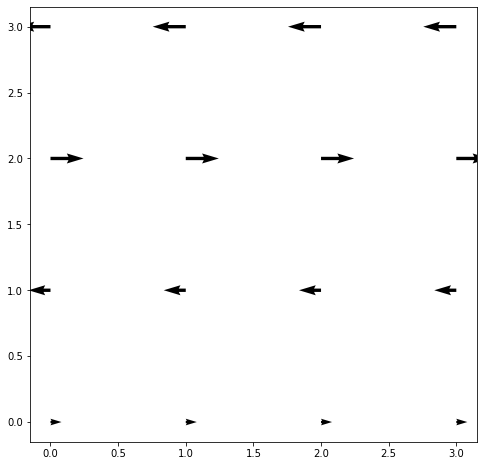

In [65]:
U = [[1, 1, 1, 1], [-2, -2, -2, -2],
     [3, 3, 3, 3], [-3, -3, -3, -3]]

V = [[0, 0, 0, 0], [0, 0, 0, 0],
     [0, 0, 0, 0], [0, 0, 0, 0]]

fig, ax = plt.subplots()

ax.quiver(U, V)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

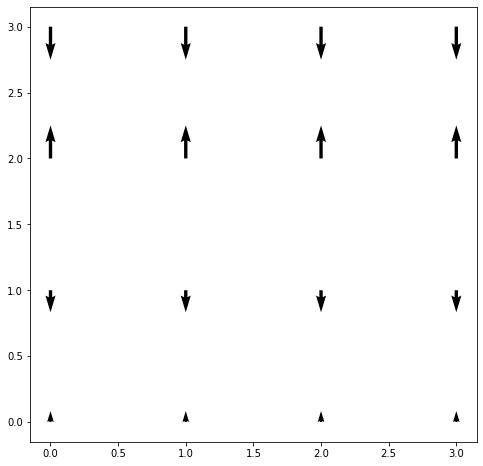

In [66]:
U = [[0, 0, 0, 0], [0, 0, 0, 0],
     [0, 0, 0, 0], [0, 0, 0, 0]]

V = [[1, 1, 1, 1], [-2, -2, -2, -2],
     [3, 3, 3, 3], [-3, -3, -3, -3]]

fig, ax = plt.subplots()

ax.quiver(U, V)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

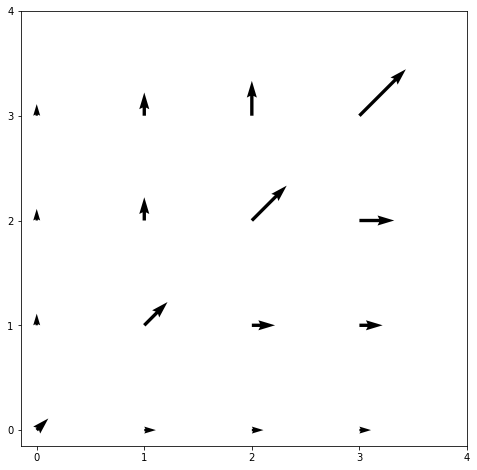

In [67]:
U = [[1, 1, 1, 1],
     [0, 2, 2, 2],
     [0, 0, 3, 3],
     [0, 0, 0, 4]]

V = [[1, 0, 0, 0],
     [1, 2, 0, 0],
     [1, 2, 3, 0],
     [1, 2, 3, 4]]

fig, ax = plt.subplots()

ax.quiver(U, V)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
ax.set_xticks(np.arange(4.5))
ax.set_yticks(np.arange(4.5))

plt.show()

**Координаты стрелок**

На предыдущих примерах видно, что каждая стрелка начинается в узлах целочисленной регулярной решетки, которую matplotlib создает автоматически. Но мы можем и сами управлять положением каждой стрелки с помощью параметров X и Y. Как нетрудно догадаться, это два двумерных массива с x и y координатами начала стрелок. Причем размеры X и Y совпадают с размерами U и V, т.е. размеры X, Y, U и V должны совпадать:

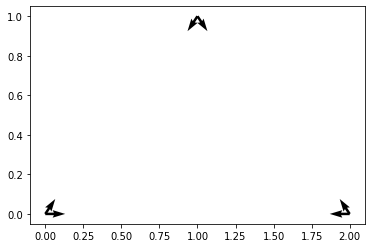

In [68]:
X = [0, 0, 1, 1, 2, 2]
Y = [0, 0, 1, 1, 0, 0]

U = [2, 4, -2, 2, -4, -2]
V = [3, 0, -3, -3, 0, 3]

fig, ax = plt.subplots()

ax.quiver(X, Y, U, V)

plt.show()

В этом примере мы использовали одномерные массивы, но это только для наглядности. Учитывая, что мы работаем с двумерной сеткой, лучше (хотя вовсе не обязательно) использовать двумерные массивы:

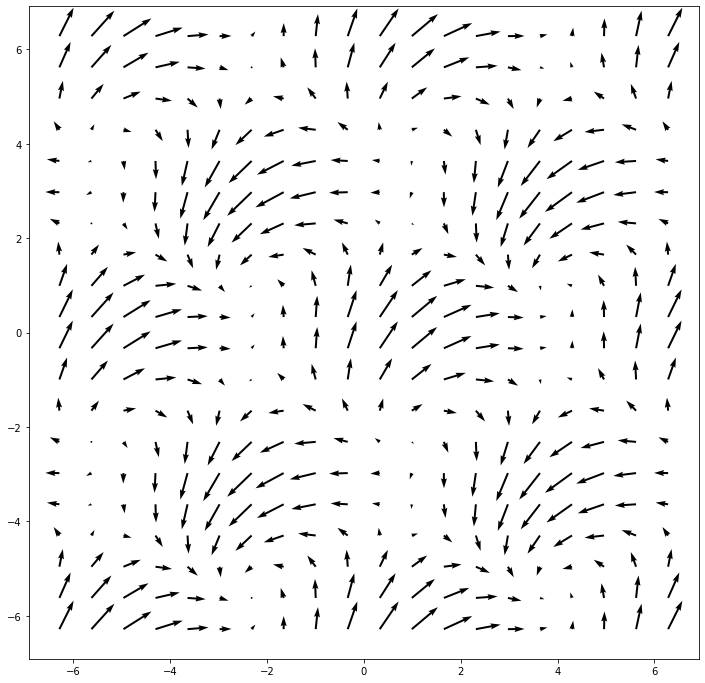

In [69]:
X, Y = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]

U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

fig, ax = plt.subplots()

ax.quiver(X, Y, U, V)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

**Цвет стрелок**

Параметр C позволяет с помощью массива определить цвет каждой стрелки:

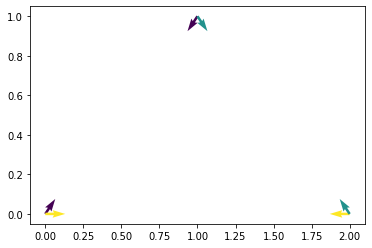

In [70]:
X = [0, 0, 1, 1, 2, 2]
Y = [0, 0, 1, 1, 0, 0]

U = [2, 4, -2, 2, -4, -2]
V = [3, 0, -3, -3, 0, 3]

C = [0, 2, 0, 1, 2, 1]

fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, C)

plt.show()

Стрелки могут быть как одноцветными так и разноцветными, причем цвет стрелок так же как их длина и направление может отражать некоторую закономерность:

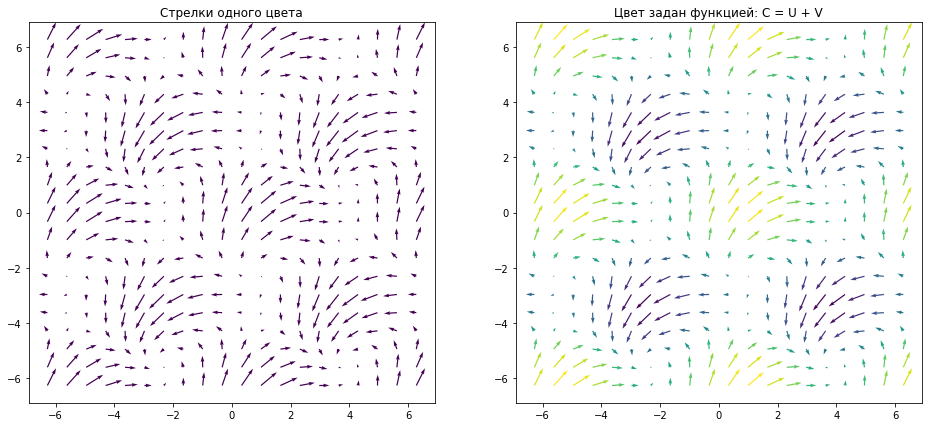

In [71]:
X, Y = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]

U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

fig, axes = plt.subplots(1, 2)

C = np.full_like(X, 5)
axes[0].quiver(X, Y, U, V, C)
axes[0].set_title('Стрелки одного цвета')

C = U + V
axes[1].quiver(X, Y, U, V, C)
axes[1].set_title('Цвет задан функцией: C = U + V')


fig.set_figwidth(16)    #  ширина и
fig.set_figheight(7)    #  высота "Figure"

plt.show()

Однако, параметр C не позволяет задавать цвет строк с помощью строк или управлять прозрачностью стрелок. Поэтому, если параметр C не дает нужного результата то можно вместо него указать параметр **color**:

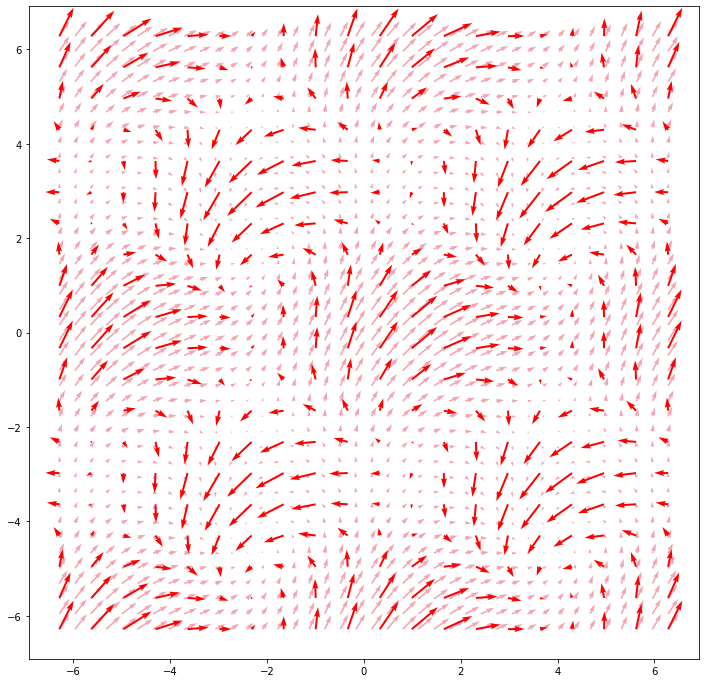

In [72]:
X, Y = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]

U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, 
          color = 'r')

X, Y = np.mgrid[-2*np.pi:2*np.pi:40j,
                -2*np.pi:2*np.pi:40j]

U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

ax.quiver(X, Y, U + 1, V + 1, 
          color = '#dd113360')    #  RGBA

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

# 5.12. Streamplot - поток векторов

Говоря о векторном пространстве, можно ввести такое понятие как векторный поток - там где векторы длиннее там и сильнее их поток. Если векторы мы изображаем прямыми стрелками, то поток изображается стрелками, которые могут иметь самую разную кривизну, в зависимости от неоднородности векторного пространства. Взгляните на этот график и вы легко догадаетесь как связано векторное пространство и его векторный поток:


---



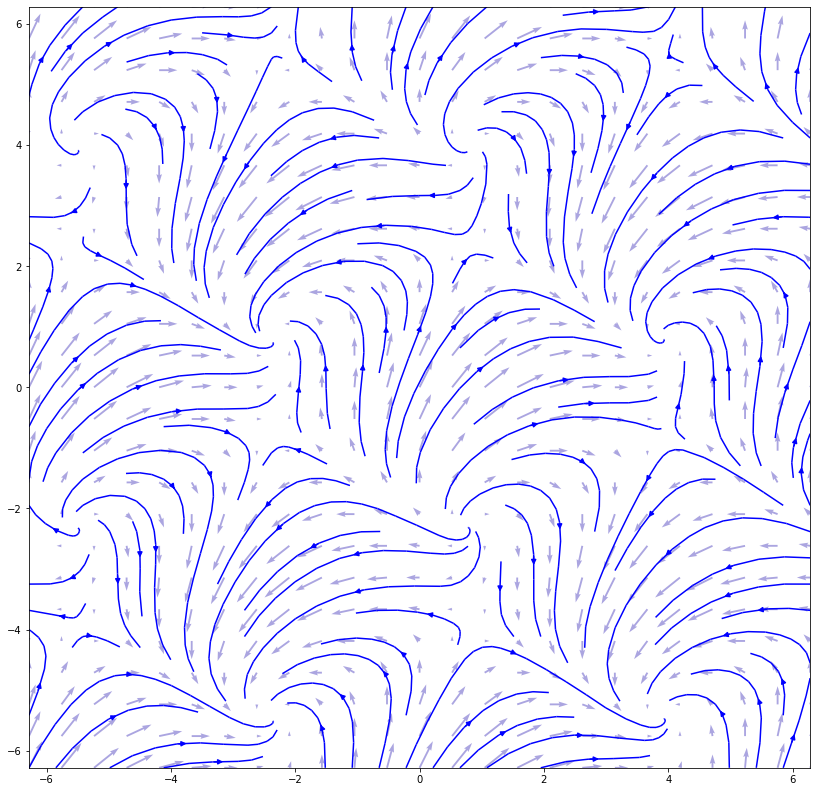

In [73]:
fig, ax = plt.subplots()

Y, X = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]
U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

#  Строим поток векторов:
ax.streamplot(X, Y, U, V, 
              color = 'b')

X, Y = np.mgrid[-2*np.pi:2*np.pi:25j,
                -2*np.pi:2*np.pi:25j]
U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

#  Поверх потока строим векторное поле:
ax.quiver(X, Y, U, V, 
          color = '#2011af60')    #  RGBA

fig.set_figwidth(14)    #  ширина и
fig.set_figheight(14)    #  высота "Figure"

plt.show()

**Простой пример**

Метод **streamplot** всегда принимает четыре обязательных параметра:

* X, y - одномерные координатные массивы.

* U, V - массивы длин векторов (под которыми сейчас понимаются векторы скоростей потоков). Количество строк в этих массивах должно соответствовать длине Y, а количество столбцов длине X;

И еще один важный момент - все массивы должны быть массивами NumPy:

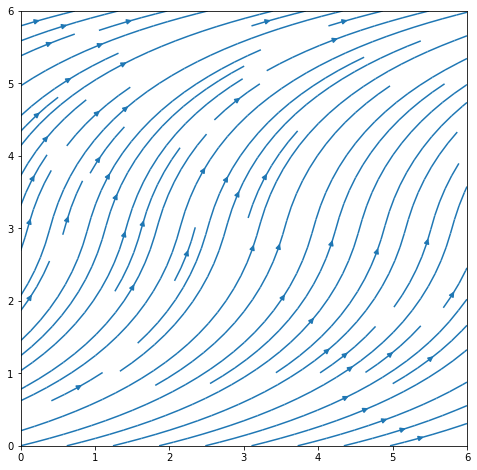

In [74]:
#  X = np.arange(7)
X = np.array([0, 1, 2, 3, 4, 5, 6])

#  Y = np.arange(7)
Y = np.array([0, 1, 2, 3, 4, 5, 6])

#  U = np.repeat([4,3,2,1,2,3,4], 7).reshape(7, 7)
U = np.array([[4, 4, 4, 4, 4, 4, 4],
              [3, 3, 3, 3, 3, 3, 3],
              [2, 2, 2, 2, 2, 2, 2],
              [1, 1, 1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2, 2, 2],
              [3, 3, 3, 3, 3, 3, 3],
              [4, 4, 4, 4, 4, 4, 4]])

#  V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)
V = np.array([[1, 1, 1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2, 2, 2],
              [3, 3, 3, 3, 3, 3, 3],
              [4, 4, 4, 4, 4, 4, 4],
              [3, 3, 3, 3, 3, 3, 3],
              [2, 2, 2, 2, 2, 2, 2],
              [1, 1, 1, 1, 1, 1, 1]])

fig, ax = plt.subplots()

ax.streamplot(X, Y, U, V)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**Цвет линий**

Цвет линий задается с помощью параметра color или cmap:

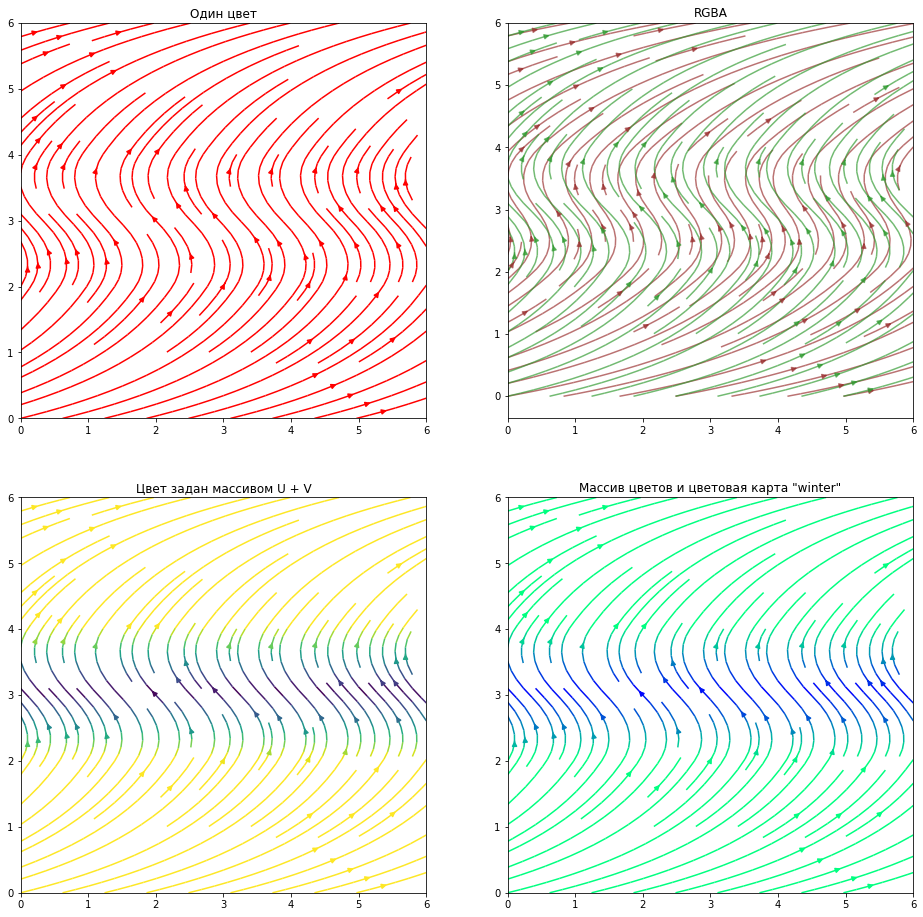

In [75]:
X = np.arange(7)
Y = np.arange(7)

U = np.repeat([4,3,2,-4,2,3,4], 7).reshape(7, 7)
V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)

fig, axes = plt.subplots(2, 2)

axes[0][0].streamplot(X, Y, U, V,
                      color = 'r')
axes[0][0].set_title('Один цвет')

axes[0][1].streamplot(X, Y, U + 1, V,
                      color = '#9a3030ad')
axes[0][1].streamplot(X, Y, U, V,
                      color = '#309a30ad')
axes[0][1].set_title('RGBA')

axes[1][0].streamplot(X, Y, U, V,
                      color = U + V)
axes[1][0].set_title('Цвет задан массивом U + V')

axes[1][1].streamplot(X, Y, U, V,
                      color = U + V,
                      cmap = 'winter')
axes[1][1].set_title('Массив цветов и цветовая карта "winter"')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(16)    #  высота "Figure"

plt.show()

Параметр cmap указывается вместо color только в случае если цвет задан массивом.


---

**Плотность линий**

Плотность линий задается параметром **density**:

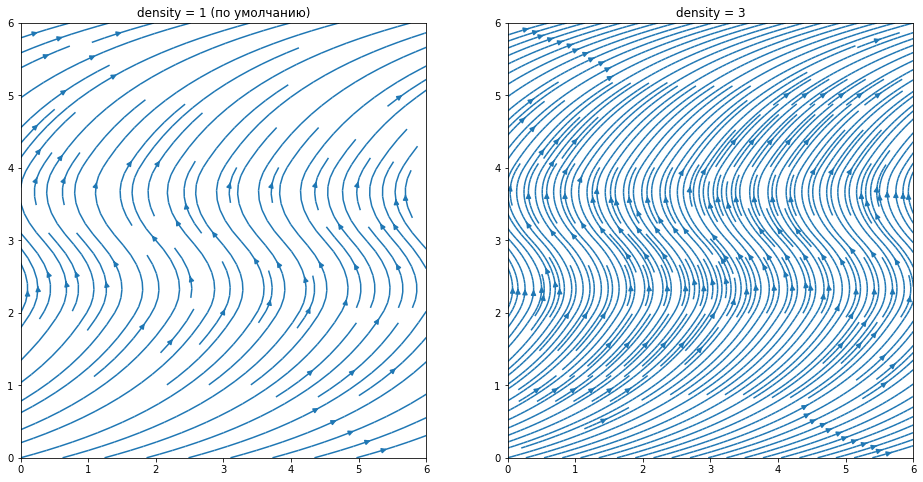

In [76]:
X = np.arange(7)
Y = np.arange(7)

U = np.repeat([4,3,2,-4,2,3,4], 7).reshape(7, 7)
V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)

fig, axes = plt.subplots(1, 2)

axes[0].streamplot(X, Y, U, V,
              density = 1)
axes[0].set_title('density = 1 (по умолчанию)')

axes[1].streamplot(X, Y, U, V,
              density = 3)
axes[1].set_title('density = 3')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**Толщина линий**

Толщина линий задается параметром linewidth:

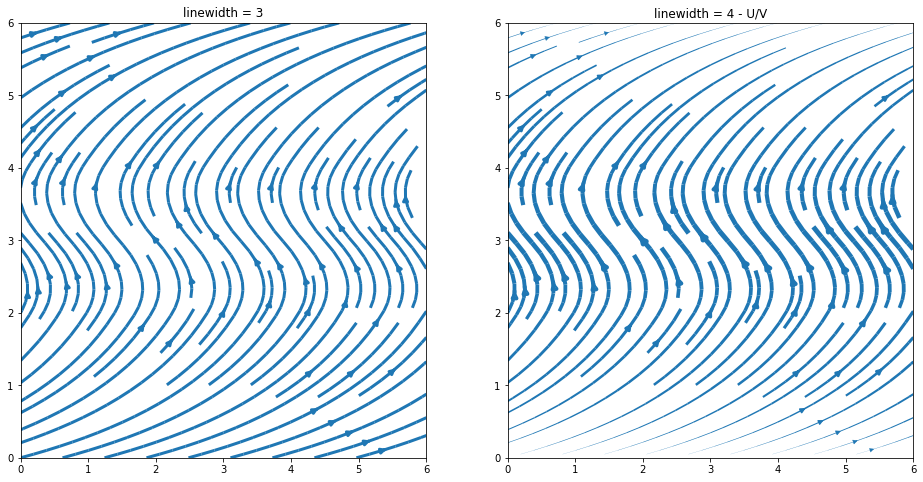

In [77]:
X = np.arange(7)
Y = np.arange(7)

U = np.repeat([4,3,2,-4,2,3,4], 7).reshape(7, 7)
V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)

fig, axes = plt.subplots(1, 2)

axes[0].streamplot(X, Y, U, V,
              linewidth = 3)
axes[0].set_title('linewidth = 3')

axes[1].streamplot(X, Y, U, V,
              linewidth =  4 - U/V )
axes[1].set_title('linewidth = 4 - U/V')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**Величина стрелок**

Иногда стрелки могут оказаться слишком маленькими, а их начертание неподходящим. Изменить их размер позволяет параметр **arrowsize**, а начертание **arrowstyle**:

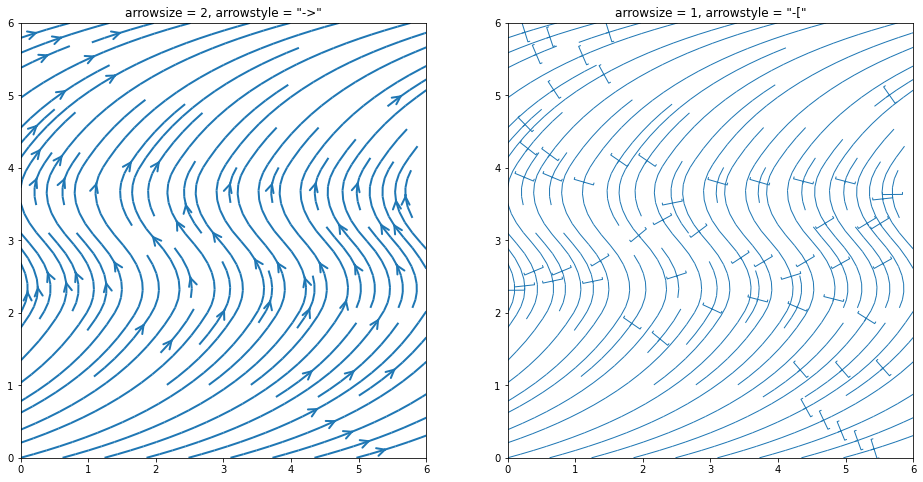

In [78]:
X = np.arange(7)
Y = np.arange(7)

U = np.repeat([4,3,2,-4,2,3,4], 7).reshape(7, 7)
V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)

fig, axes = plt.subplots(1, 2)

axes[0].streamplot(X, Y, U, V,
                   linewidth = 2,
                   arrowsize = 2,
                   arrowstyle = '->')
axes[0].set_title('arrowsize = 2, arrowstyle = "->"')

axes[1].streamplot(X, Y, U, V,
                   linewidth = 1,
                   arrowsize = 1,
                   arrowstyle = '-[')
axes[1].set_title('arrowsize = 1, arrowstyle = "-["')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**Длина линий**





Задать максимальную и минимальную длину линий можно с помощью параметров **minlength** и **maxlength**:

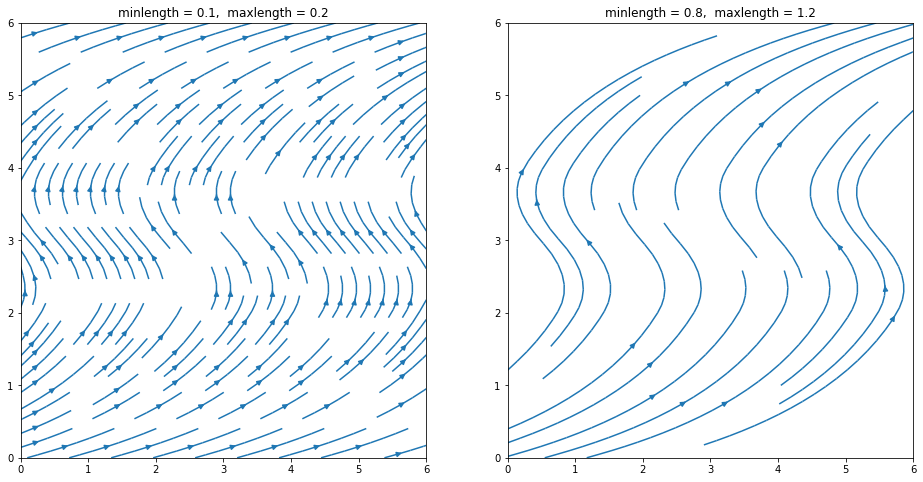

In [79]:
X = np.arange(7)
Y = np.arange(7)

U = np.repeat([4,3,2,-4,2,3,4], 7).reshape(7, 7)
V = np.repeat([1,2,3,4,3,2,1], 7).reshape(7, 7)

fig, axes = plt.subplots(1, 2)

axes[0].streamplot(X, Y, U, V,
                   minlength = 0.1,
                   maxlength = 0.2)
axes[0].set_title('minlength = 0.1,  maxlength = 0.2')

axes[1].streamplot(X, Y, U, V,
                   minlength = 0.8,
                   maxlength = 1.2)
axes[1].set_title('minlength = 0.8,  maxlength = 1.2')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

# 6.1. Заголовки графиков

Добавить заголовок к области Axes можно с помощью метода **set_title(label, fontdict=None, loc='center', pad=None, **kwargs)**, который принимает четыре позиционных аргумента и целую кучу аргументов по ключу. В простейшем случае, мы просто указываем заголовок в виде строки:


---



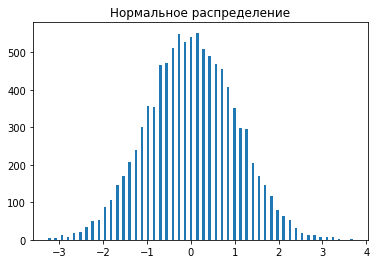

In [80]:
data = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title('Нормальное распределение')

plt.show()

Параметр fontdict не очень удобен и редко используется, в тоже время параметры loc и pad позволяют ,быстро задать горизонтальное и вертикальное выравнивание:

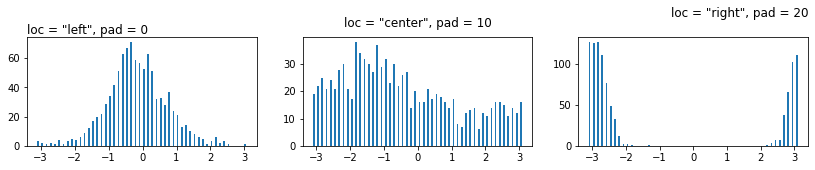

In [81]:
fig, axes = plt.subplots(1, 3)

for ax in axes:
    mu = 10*np.random.random()
    kappa = 10*np.random.random()
    data = np.random.vonmises(mu, kappa, size=1000)
    ax.hist(data, bins = 50, rwidth = 0.4)

#  Вертикальное и горизонтальное выравнивание заголовков:
axes[0].set_title('loc = "left", pad = 0',
                loc = 'left',
                pad = 0)    #  задает расстояние в точках

axes[1].set_title('loc = "center", pad = 10',
                loc = 'center',     #  значение по умолчанию
                pad = 10)

axes[2].set_title('loc = "right", pad = 20',
                loc = 'right',
                pad = 20)

fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

Параметр fontsize устанавливает размер шрифта, а параметры color и backgroundcolor его цвет и цвет области фона заголовка:

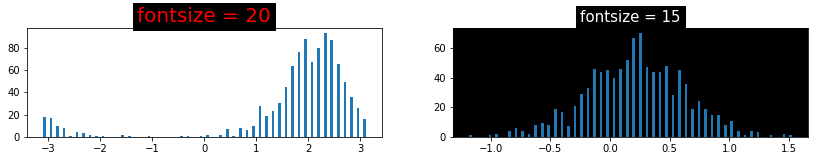

In [82]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    mu = 10*np.random.random()
    kappa = 10*np.random.random()
    data = np.random.vonmises(mu, kappa, size=1000)
    ax.hist(data, bins = 50, rwidth = 0.4)

#  Размер шрифта его цвет и цвет фона:
axes[0].set_title('fontsize = 20',
                  fontsize = 20,
                  color = 'red',
                  backgroundcolor = 'black')

axes[1].set_facecolor('black')
axes[1].set_title('fontsize = 15',
                  fontsize = 15,
                  color = 'white',
                  backgroundcolor = 'black')


fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

Установить вид шрифта и его начертание можно с помощью параметров fontfamily и fontstyle:

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1072 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1074 missing from current font.
  font.set_text(s

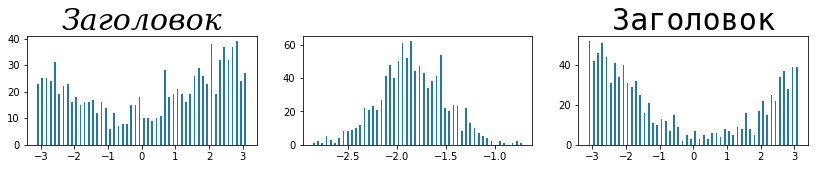

In [83]:
fig, axes = plt.subplots(1, 3)

for ax in axes:
    mu = 10*np.random.random()
    kappa = 10*np.random.random()
    data = np.random.vonmises(mu, kappa, size=1000)
    ax.hist(data, bins = 50, rwidth = 0.4)

#  Вид и начертание шрифта заголовка:
axes[0].set_title('Заголовок',
                fontfamily = 'serif',
                fontstyle = 'italic',
                fontsize = 30)

axes[1].set_title('Заголовок',
                fontfamily = 'fantasy',
                fontstyle = 'oblique',
                fontsize = 30)

axes[2].set_title('Заголовок',
                fontfamily = 'monospace',
                fontstyle = 'normal',
                fontsize = 30)

fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

В случаях нескольких областей Axes может понадобиться добавления общего заголовка для всей области Figure, это можно сделать с помощью метода suptitle():

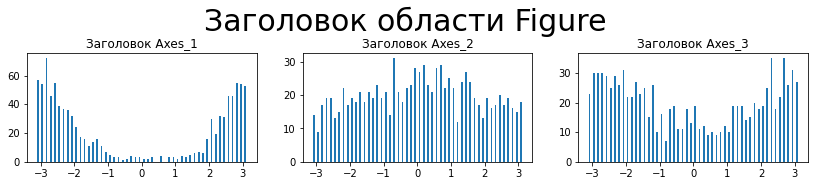

In [84]:
fig, axes = plt.subplots(1, 3)

for ax in axes:
    mu = 10*np.random.random()
    kappa = 10*np.random.random()
    data = np.random.vonmises(mu, kappa, size=1000)
    ax.hist(data, bins = 50, rwidth = 0.4)

#  Заголовок области Figure:
fig.suptitle('Заголовок области Figure',
             y = 1.2,
             fontsize = 30)
    
#  Заголовки областей Axes:
axes[0].set_title('Заголовок Axes_1')
axes[1].set_title('Заголовок Axes_2')
axes[2].set_title('Заголовок Axes_3')

fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

Данный метод, так же как и set_title() поддерживает большое количество параметров, что позволяет полностью контролировать его отображение на графике.

# 6.2. LaTeX - формулы

Формулы могут помещаться как в заголовки, так и внутрь самой области Axes с помощью метода Axes.text(), который мы рассмотрим чуть позже. Matplotlib имеет внутренний движок и все необходимое для отображения формул, так что формулы доступны прямо "из коробки".

Математический текст передается в виде строки, начало и конец которого обозначаются символом $. При этом мы должны использовать необработанные строки, т.е. ставить символ r перед открывающей строку кавычкой - это необходимо для того что бы символы \ в математическом тексте не интерпретировались как часть специальных строковых символов, таких как \n.


---

Давайте добавим заголовок к графику в виде формулы:


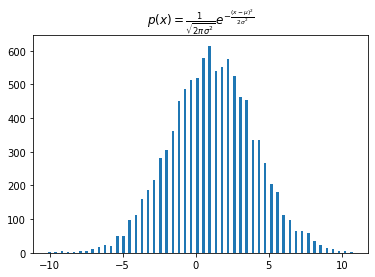

In [85]:
mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)

fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title(r'$p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$')

plt.show()

Но как видите, такое отображение никуда не годится, давайте увеличим размер заголовка и приподнимем его над Axes:

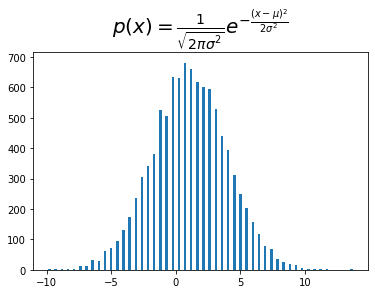

In [86]:
mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)

fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title(r'$p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$',
             fontsize = 20,    #  увеличиваем размер
             pad = 20)    #  приподнимаем над "Axes"

plt.show()

Вы можете конкатенировать математический и обычный текст, а так же вставлять символы переноса:

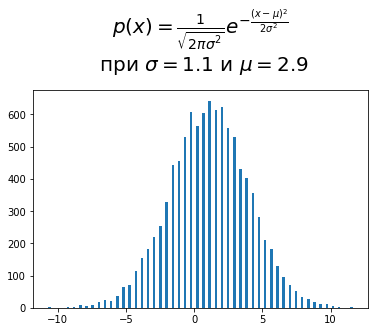

In [87]:
mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)



fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)

ax.set_title(r'$p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$'+
             '\n при '+r'$\sigma = 1.1$' + ' и ' + r'$\mu = 2.9$',
             fontsize = 20,    #  увеличиваем размер
             pad = 20)    #  приподнимаем над "Axes"


plt.show()

Математический текст может быть помещен внутрь самой области Axes методом Axes.text():

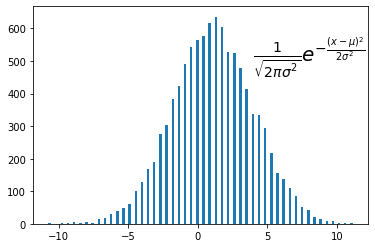

In [88]:
mu, sigma = 1.1, 2.9
data = np.random.normal(mu, sigma, 10000)

fig, ax = plt.subplots()

ax.hist(data, bins = 50, rwidth = 0.4)
ax.text(x = 4, y = 500, s = r'$\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$',
        fontsize = 20)

plt.show()

# 6.3. Добавление легенды

Легенда - это помощник, позволяющий определить что соответствует определенному цвету линии или прямоугольника. Лучше пояснить на примере:


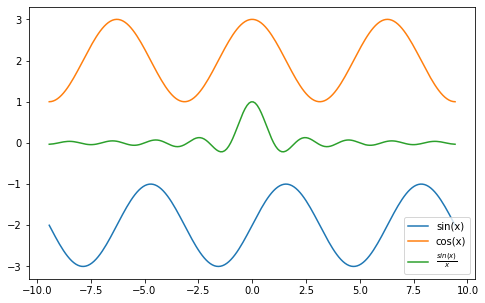

In [89]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y1 = np.sin(x) - 2
y2 = np.cos(x) + 2
y3 = np.sinc(x)

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'sin(x)')
ax.plot(x, y2, label = 'cos(x)')
ax.plot(x, y3, label = r'$\frac{sin(x)}{x}$')

ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

Легенда сделала график более информативным, хотя сама нуждается в некоторых улучшениях. Но сначала разберемся как она вообще у нас появилась. Во первых, мы добавили параметр label в каждом методе plot() - этот параметр содержит текст отображаемый в легенде. Во вторых мы добавили еще один метод legend, который собственно и помещает легенду на область Axes.

Позиционирование легенды можно установить с помощью параметра loc. по умолчанию этот параметр установлен в значение 'best', что соответствует наилучшему расположению, но это не всегда так. Иногда, положение необходимо установить вручную, для чего имеется еще 10 дополнительных параметров:

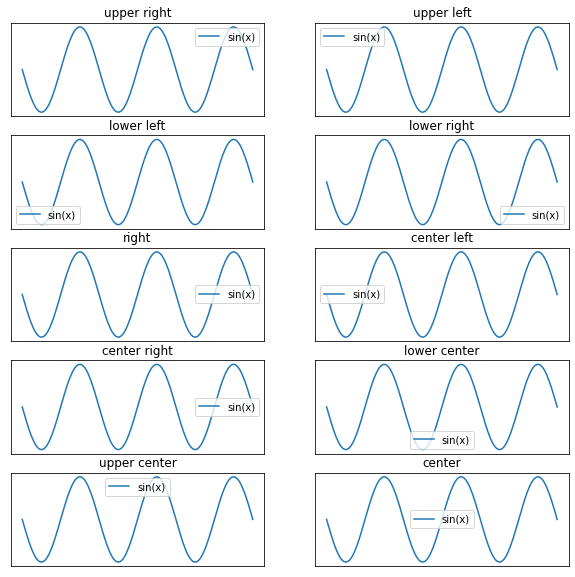

In [90]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y1 = np.sin(x)
fig, axes = plt.subplots(5, 2)

location = ['upper right', 'upper left', 'lower left',
            'lower right', 'right', 'center left', 
            'center right', 'lower center', 'upper center', 'center']
i = 0

for ax in axes.ravel():
    ax.plot(x, y1, label = 'sin(x)')
    ax.legend(loc = location[i])
    ax.set_title(location[i])
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

Параметр shadow устанавливает тень легенды и убирает ее прозрачность, а fontsize устанавливает размер шрифта:

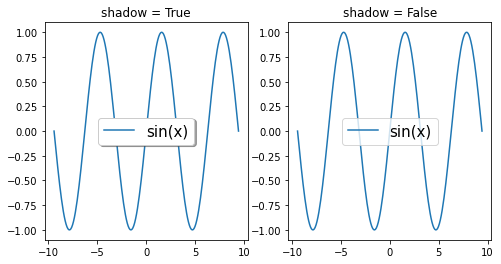

In [91]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y = np.sin(x)


fig, axes = plt.subplots(1, 2)

axes[0].plot(x, y, label = 'sin(x)')
axes[0].legend(shadow = True,
               fontsize = 15)
axes[0].set_title('shadow = True')

axes[1].plot(x, y, label = 'sin(x)')
axes[1].legend(shadow = False,
               fontsize = 15)
axes[1].set_title('shadow = False')

fig.set_figwidth(8)
fig.set_figheight(4)
plt.show()

На самом деле, мы практически не ограничены в настройке внешнего вида легенды:

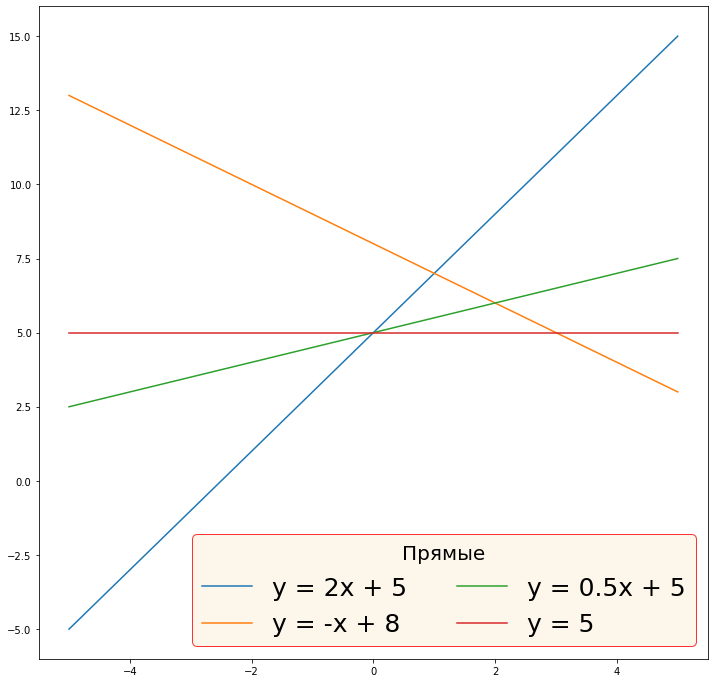

In [92]:
x = np.linspace(-5, 5, 10)

y1 = 2*x + 5
y2 = -x + 8
y3 = 0.5*x + 5
y4 = np.full(10, 5)

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'y = 2x + 5')
ax.plot(x, y2, label = 'y = -x + 8')
ax.plot(x, y3, label = 'y = 0.5x + 5')
ax.plot(x, y4, label = 'y = 5')

ax.legend(fontsize = 25,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = 'Прямые',    #  заголовок
          title_fontsize = '20'    #  размер шрифта заголовка
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()